In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sweetviz

import seaborn as sns
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import roc_auc_score,recall_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

from sklearn.model_selection import GridSearchCV

from mlxtend.classifier import StackingClassifier

from sklearn.externals import joblib

In [3]:
df=pd.read_csv('sonar.csv',sep=',',header=None)
pd.set_option('display.max_columns',None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


# EDA by sweetviz library

In [5]:
df[60]=df[60].replace(['R','M'],[0,1])#target feature must be numerical to apply sweetviz library

In [6]:
my_report=sweetviz.analyze([df,'df'],target_feat=60)

:FEATURES DONE:                    |█████████████████████| [100%]   00:55  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)


Creating Associations graph... DONE!


In [7]:
my_report.show_html('housepricetrain.html')

Report housepricetrain.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


# General Data Checking

In [8]:
df[60].value_counts()

1    111
0     97
Name: 60, dtype: int64

In [9]:
df.shape

(208, 61)

In [10]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60      int64
Length: 61, dtype: object

In [11]:
df.describe()
#All data is in between 0 to 1.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.533654
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,1.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.535725,0.659425,0.679050,0.731400,0.809325,0.816975,0.831975,0.848575,0.872175,0.873725,0.893800,0.917100,0.900275,0.852125,0.735175,0.641950,0.580300,0.556125,0.596125,0.593350,0.556525,0.518900,0.440550,0.434900,0.424350,0.387525,0.384250,0

<AxesSubplot:>

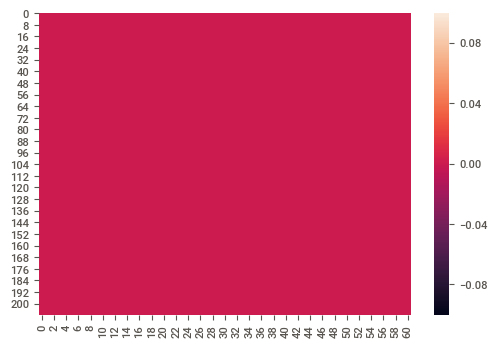

In [12]:
sns.heatmap(df.isnull())   #no missing value in dataset

# EDA

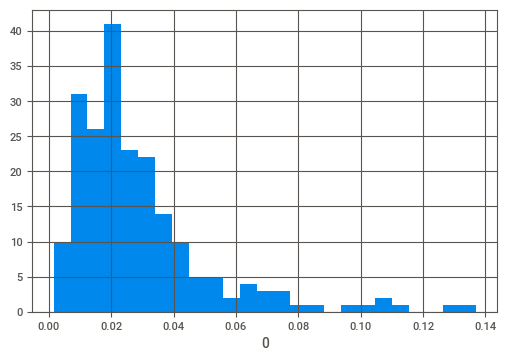

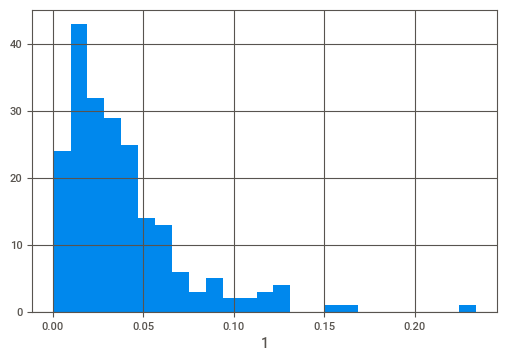

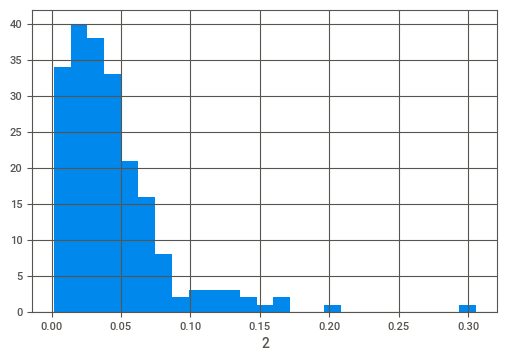

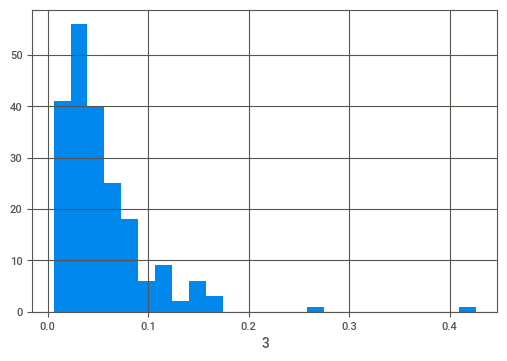

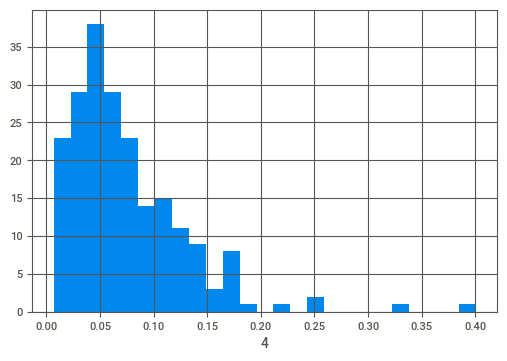

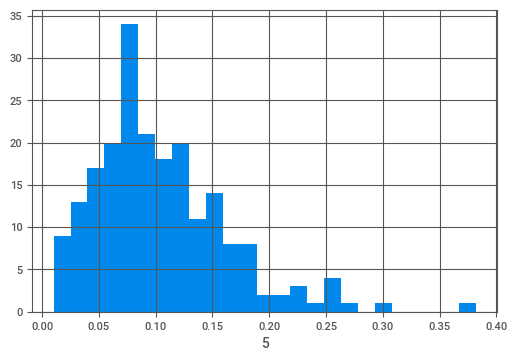

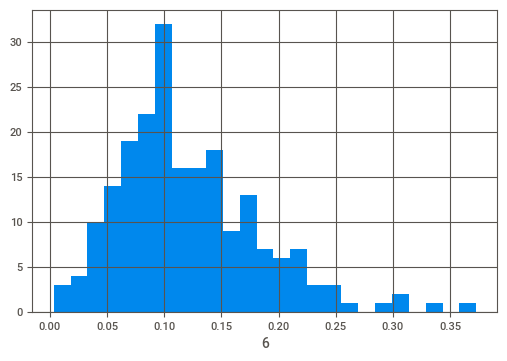

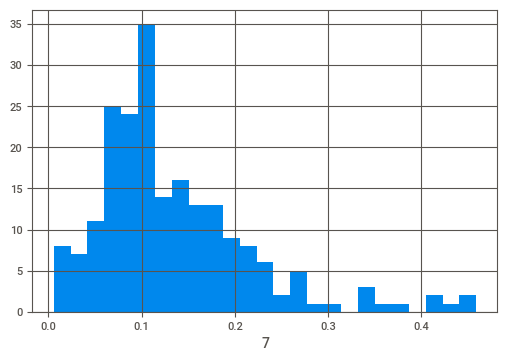

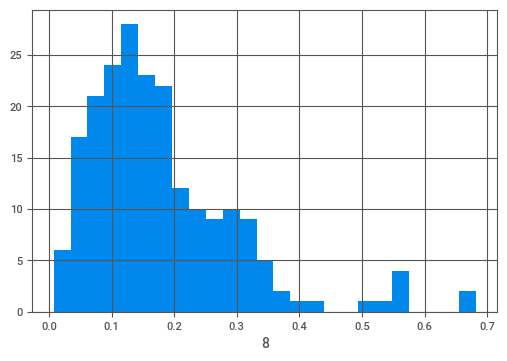

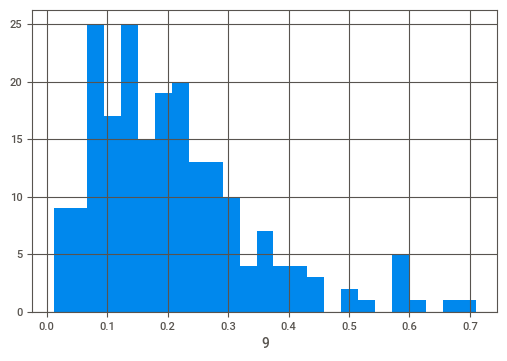

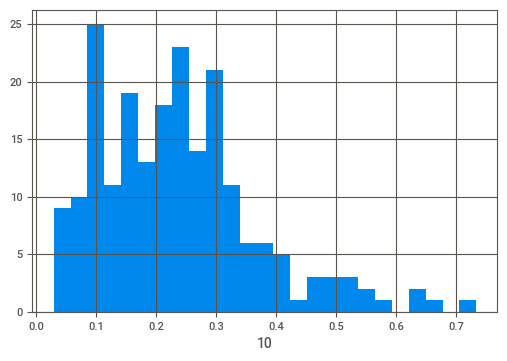

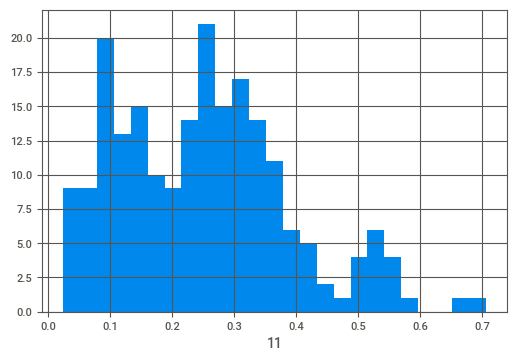

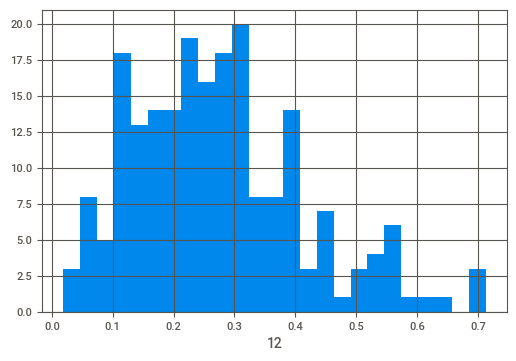

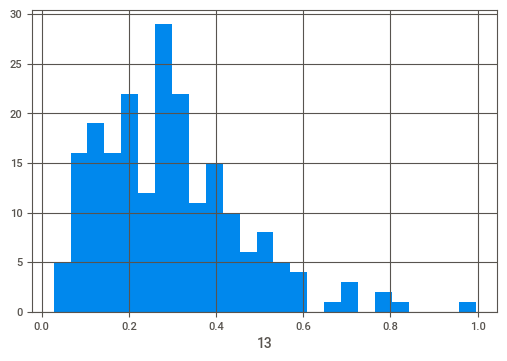

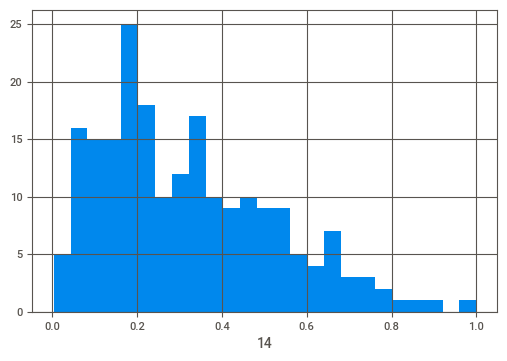

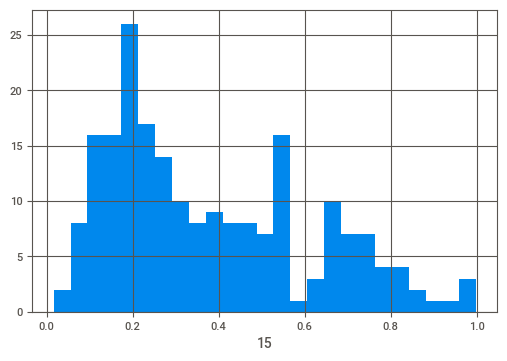

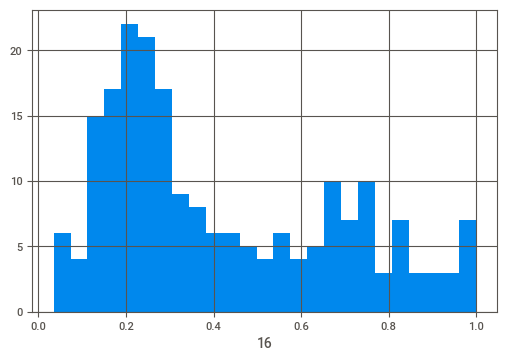

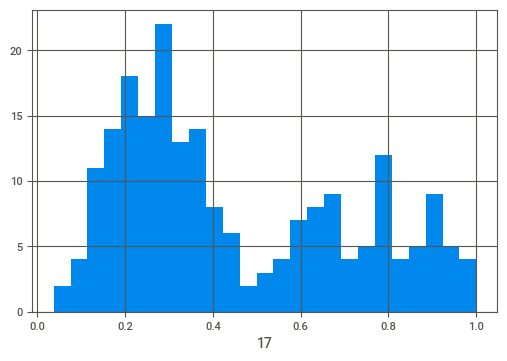

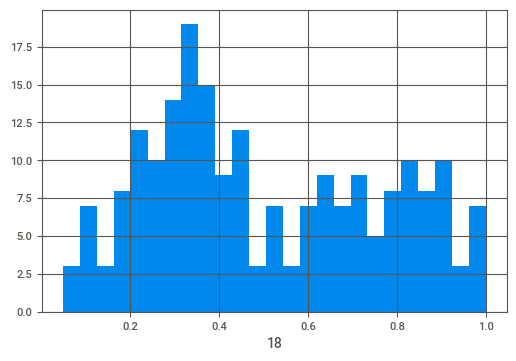

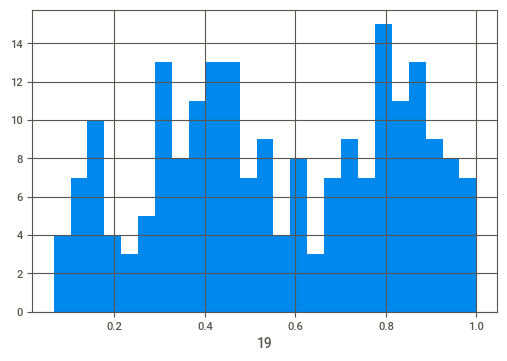

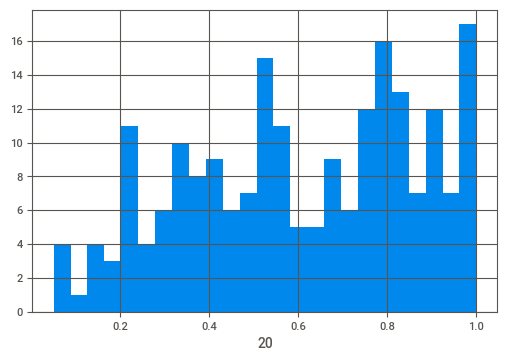

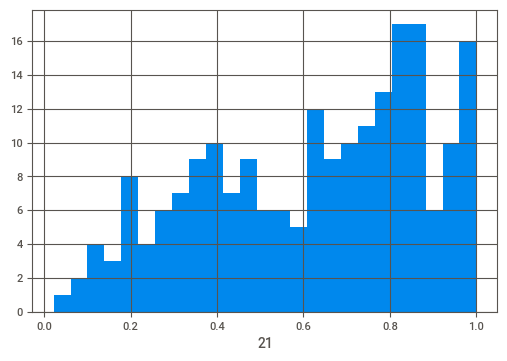

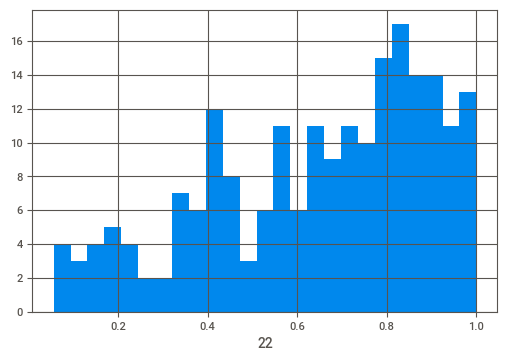

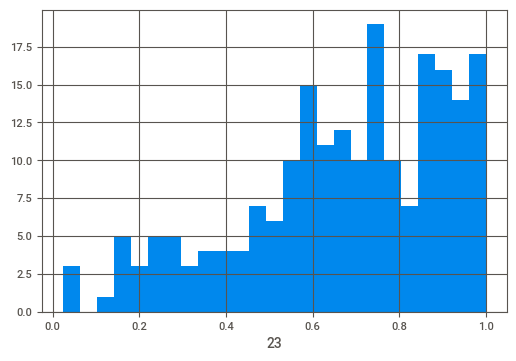

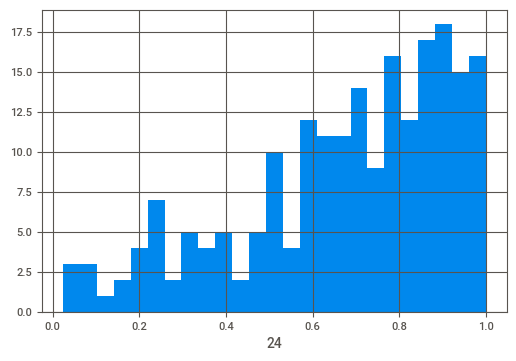

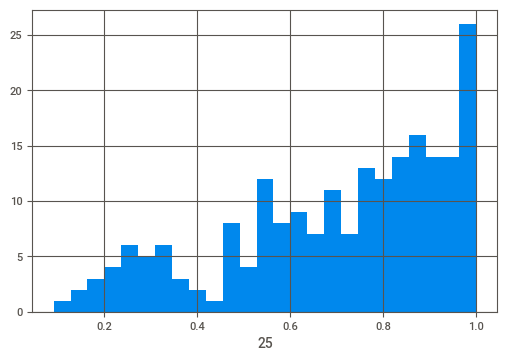

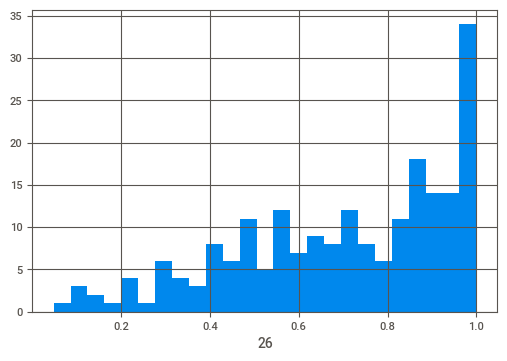

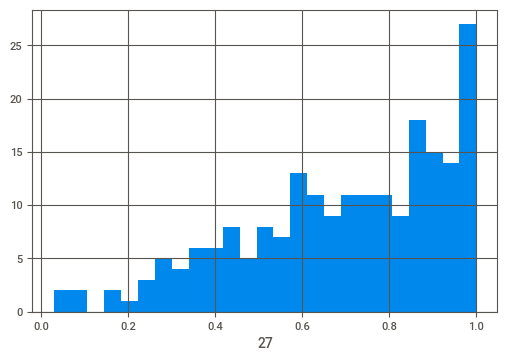

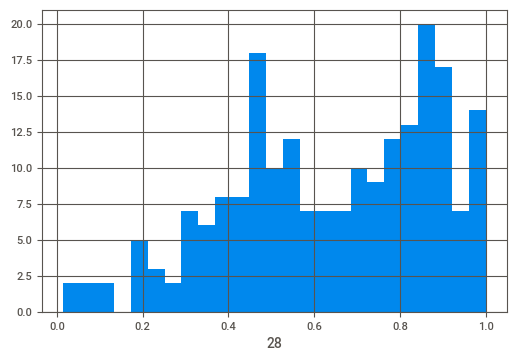

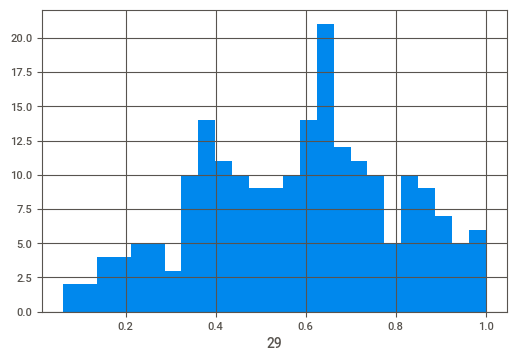

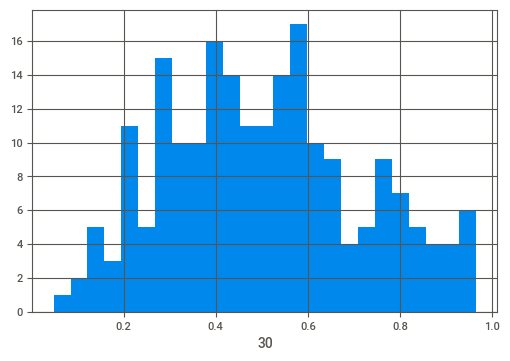

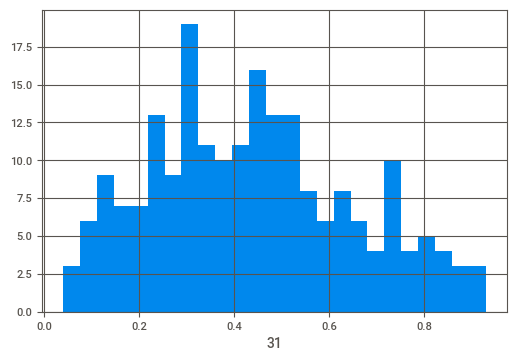

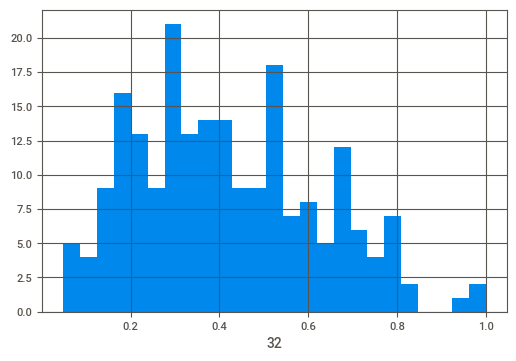

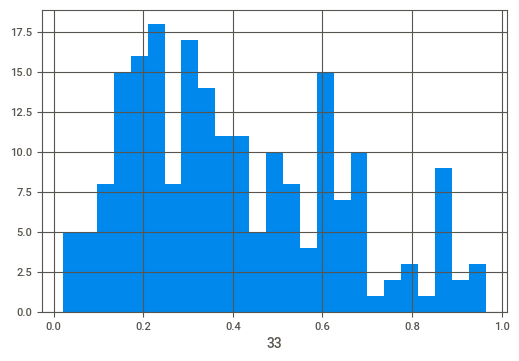

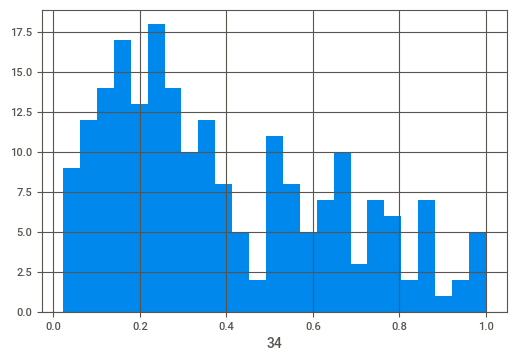

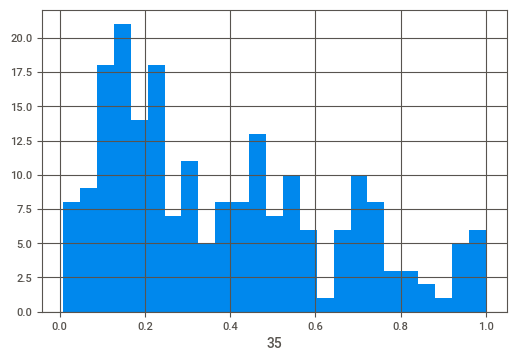

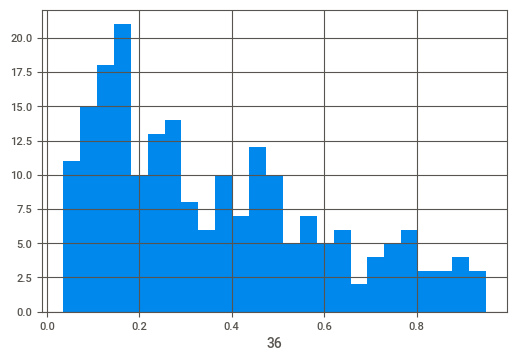

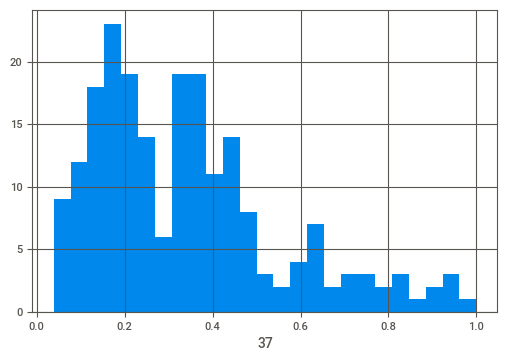

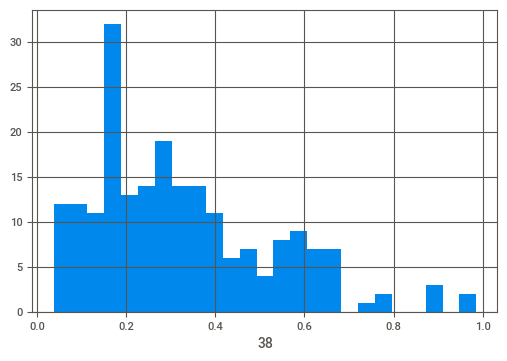

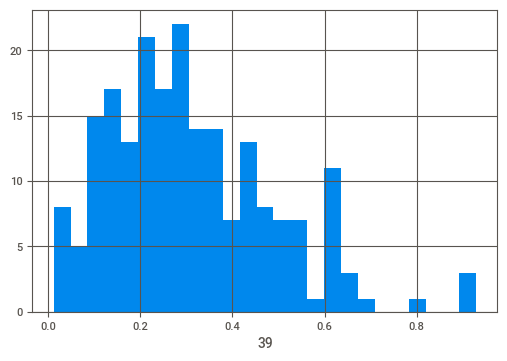

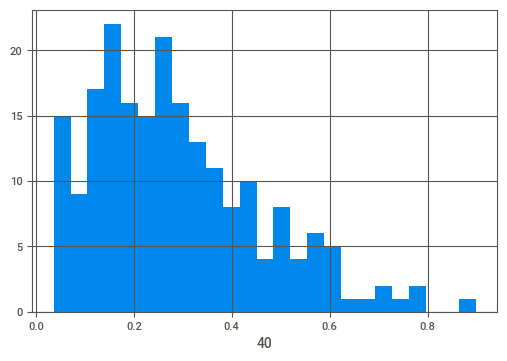

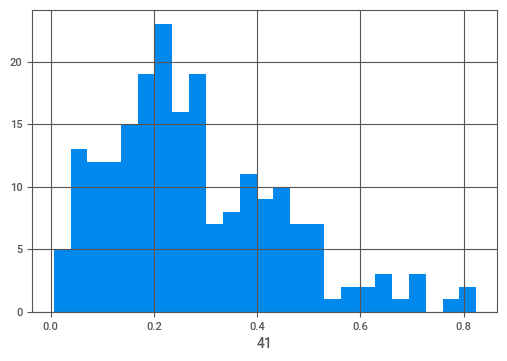

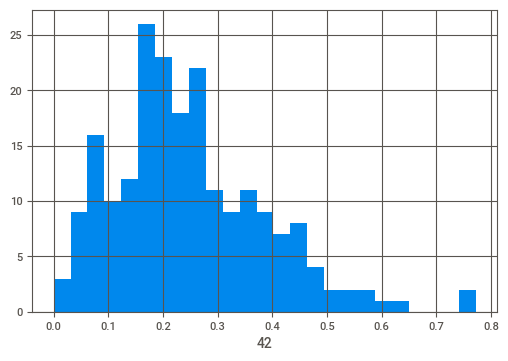

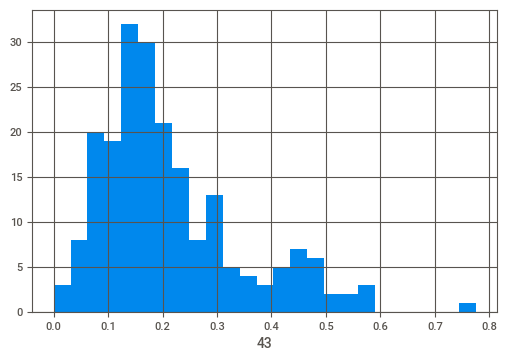

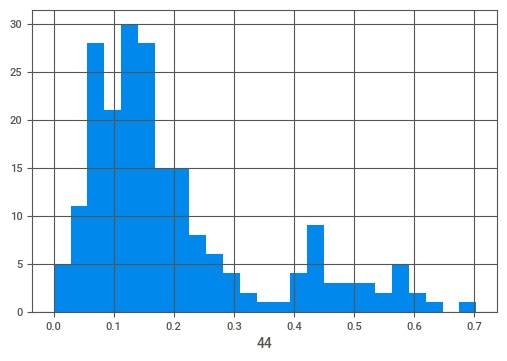

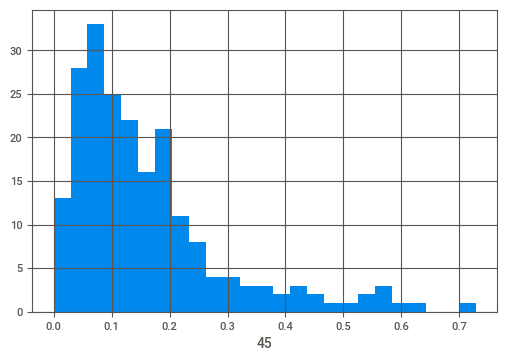

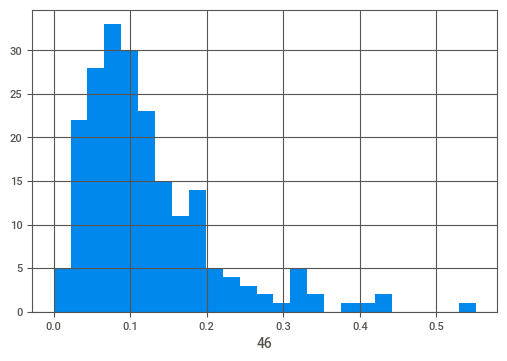

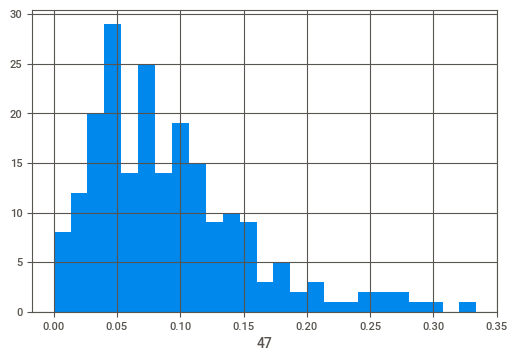

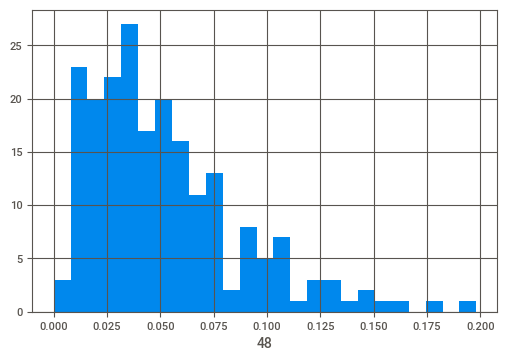

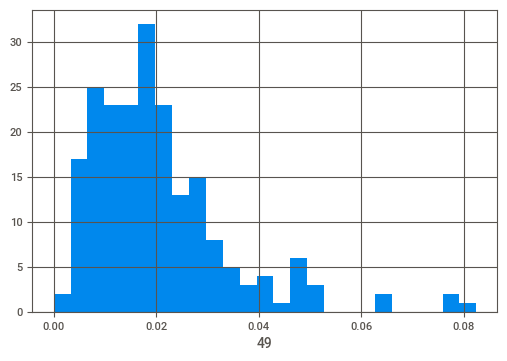

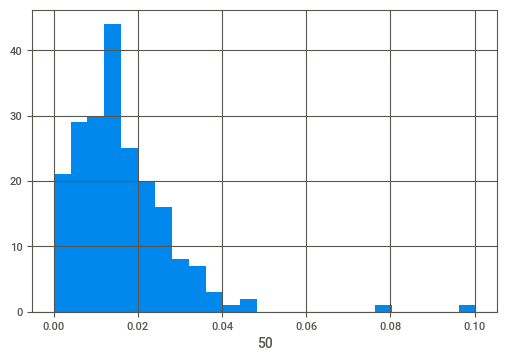

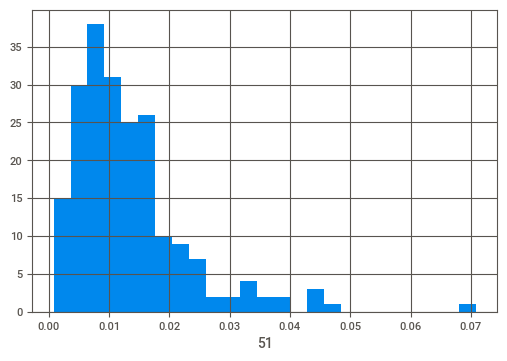

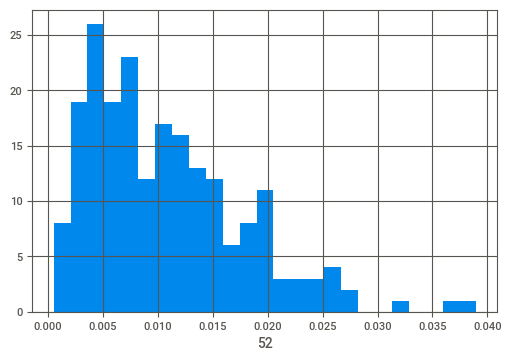

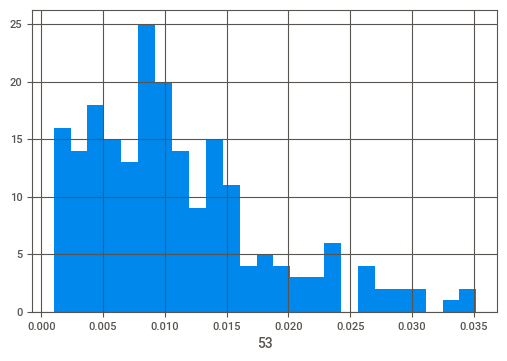

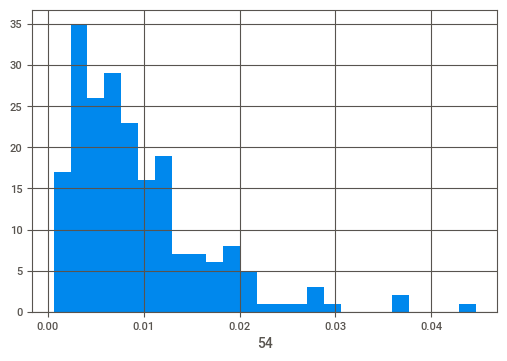

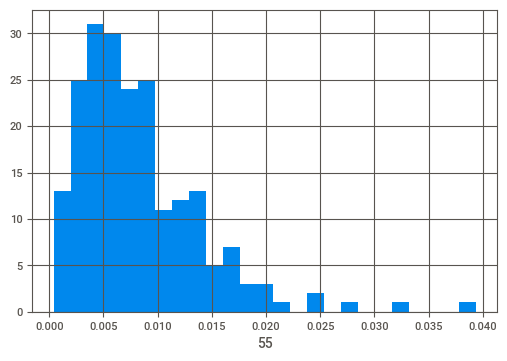

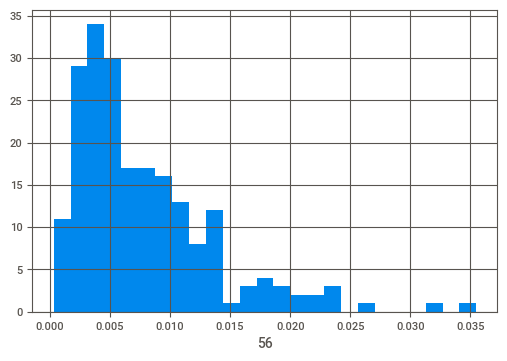

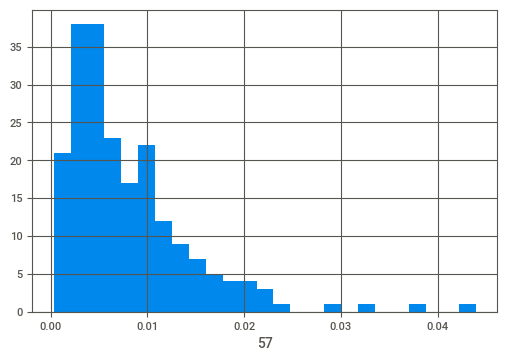

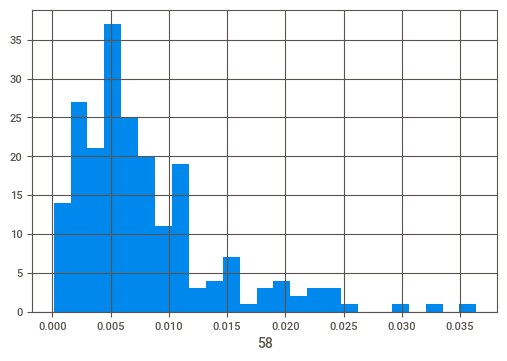

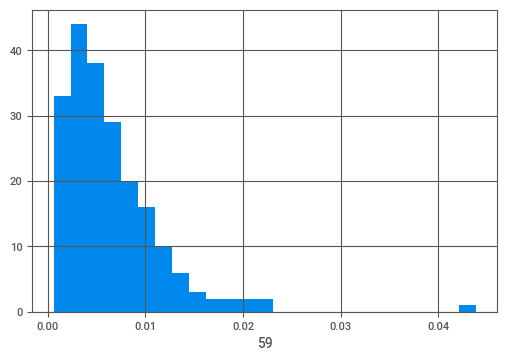

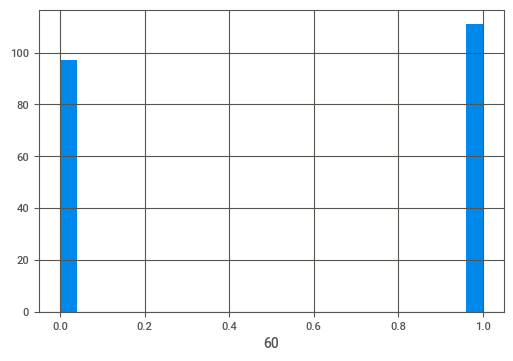

In [13]:
#checking for skewness
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()

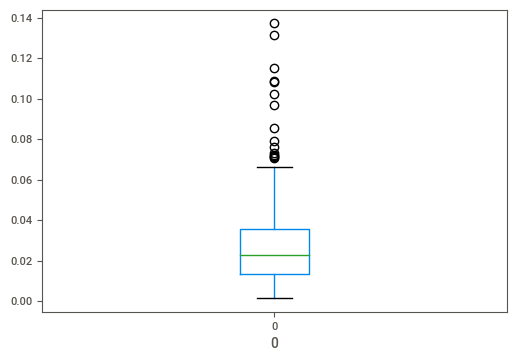

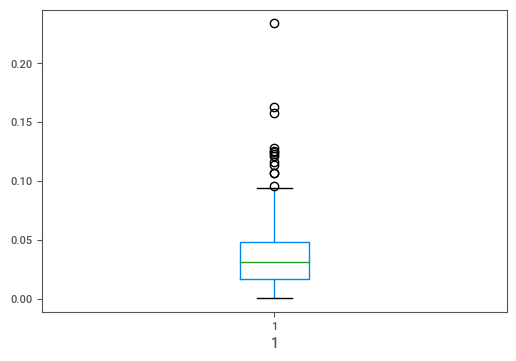

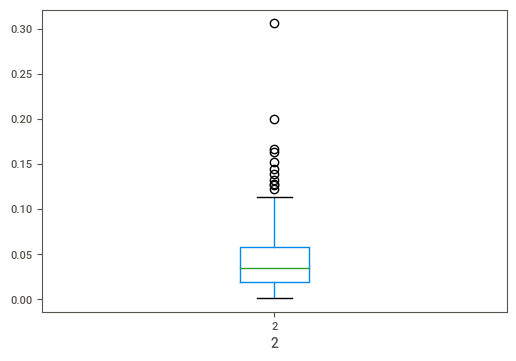

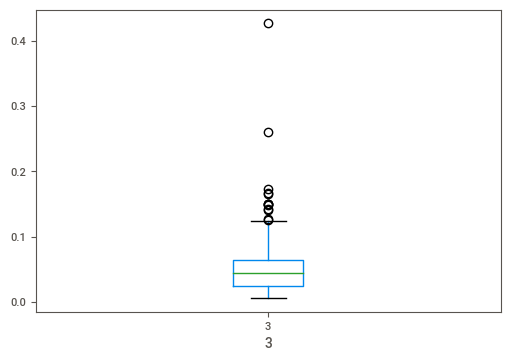

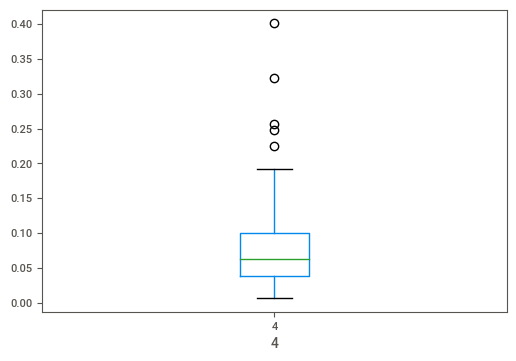

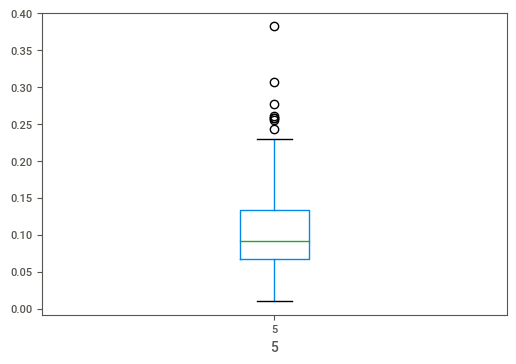

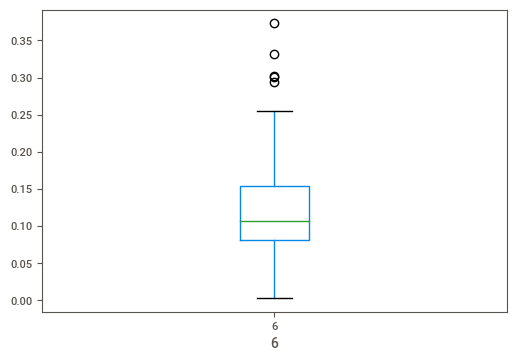

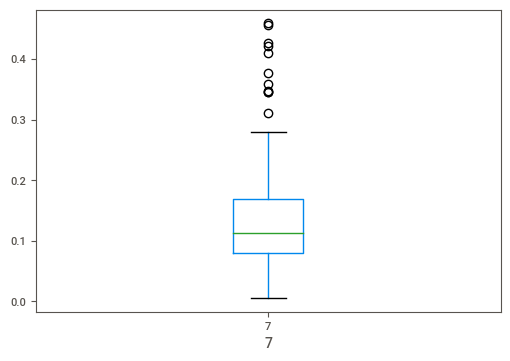

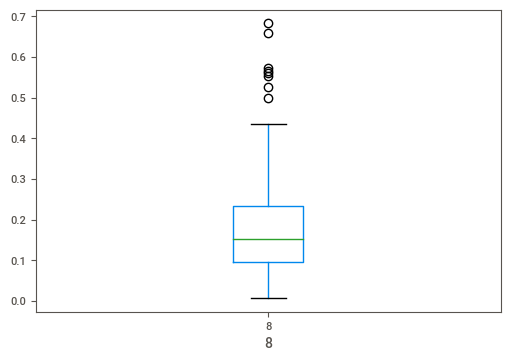

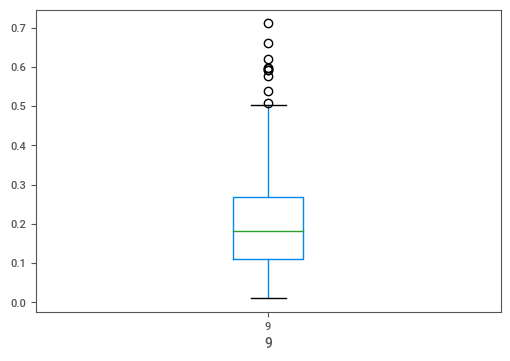

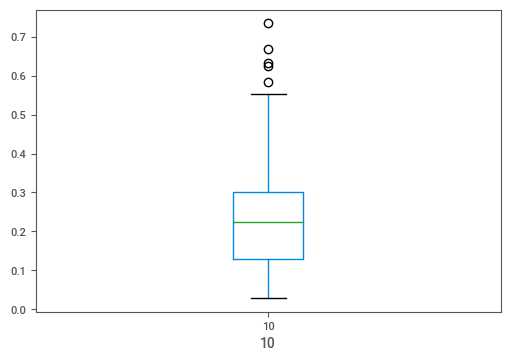

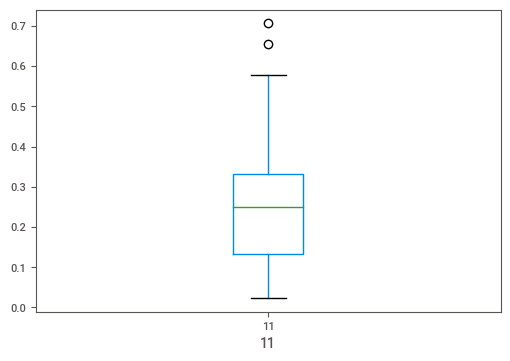

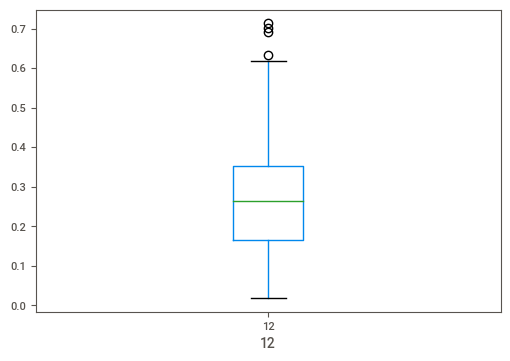

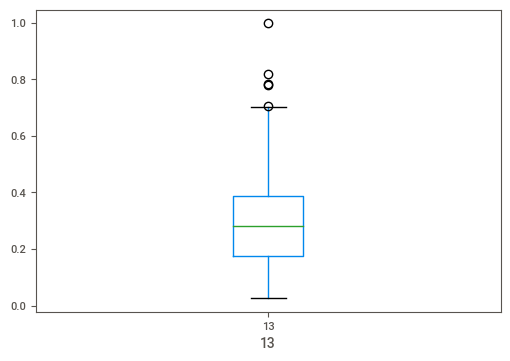

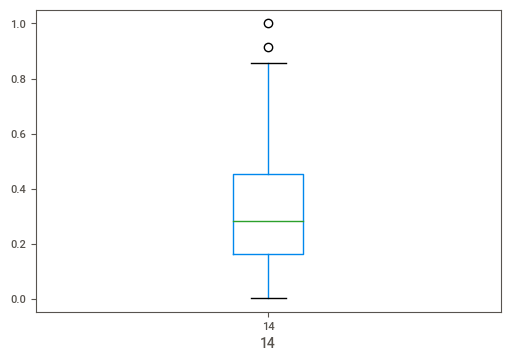

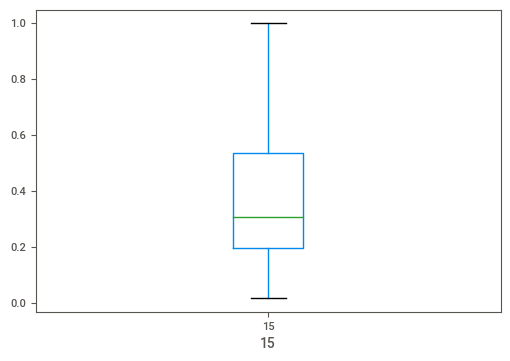

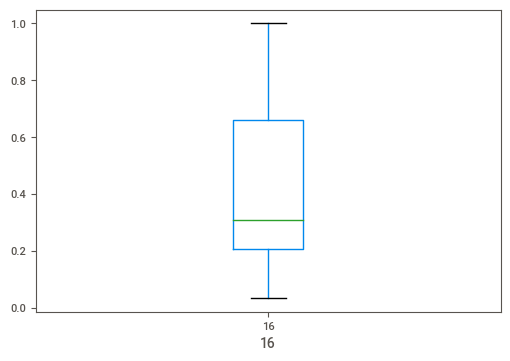

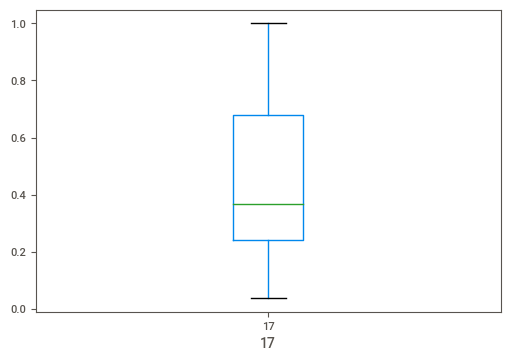

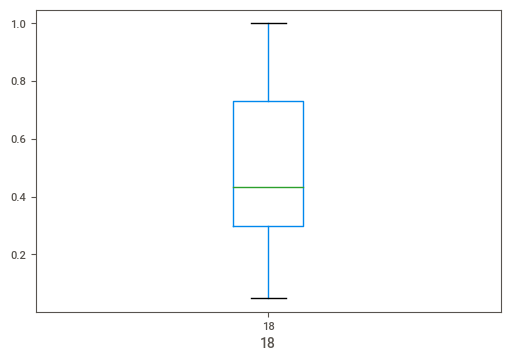

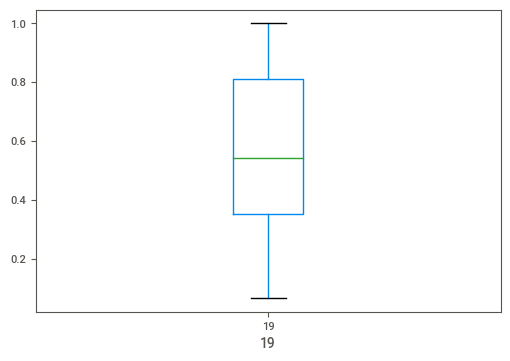

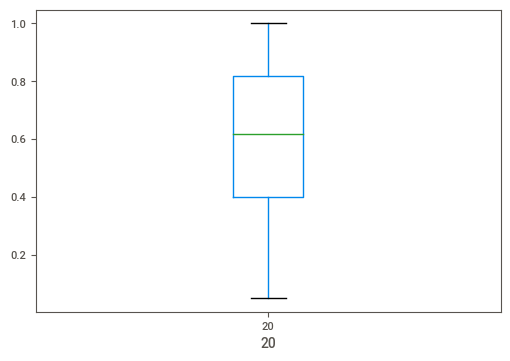

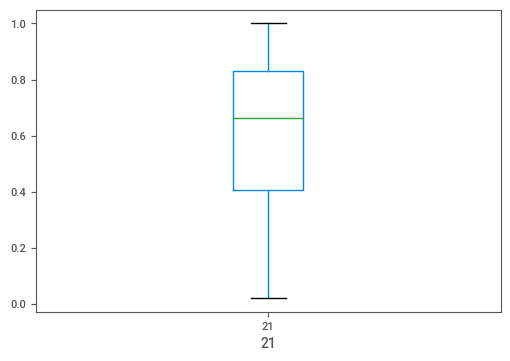

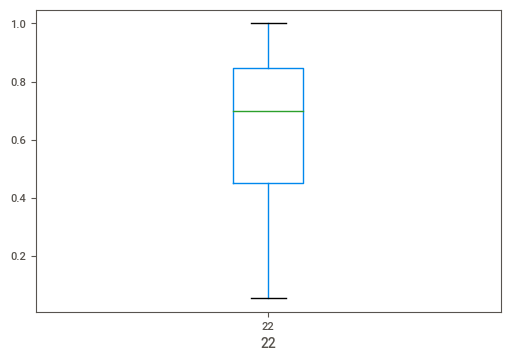

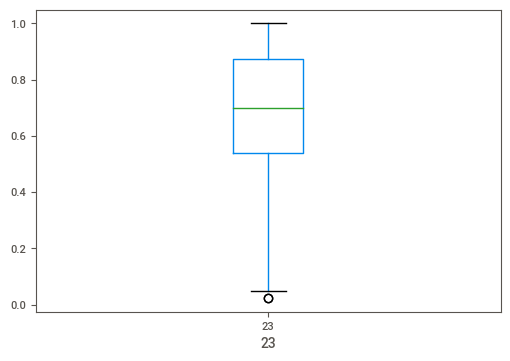

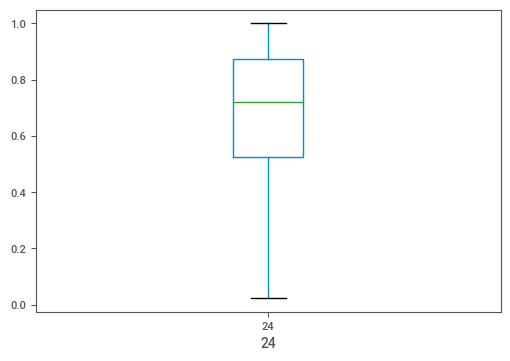

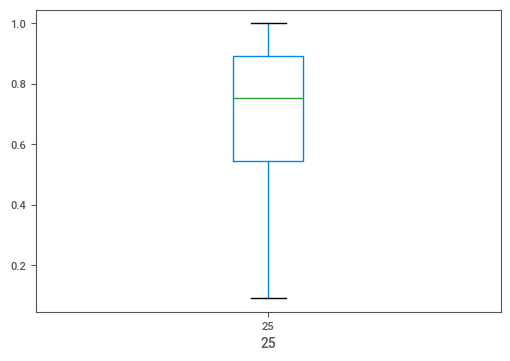

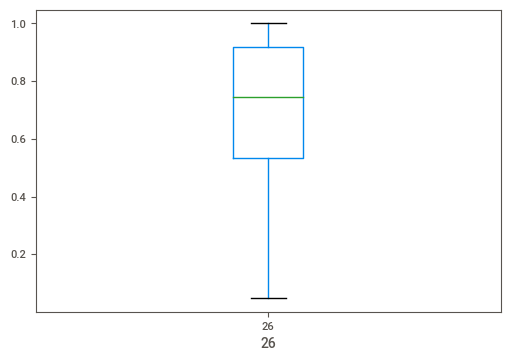

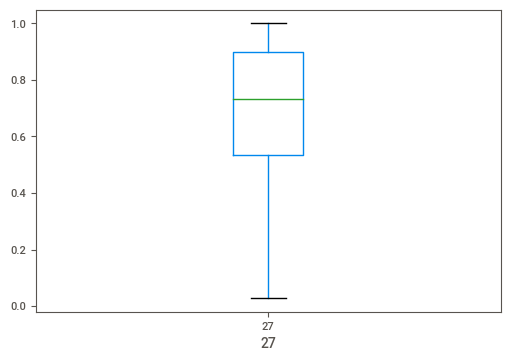

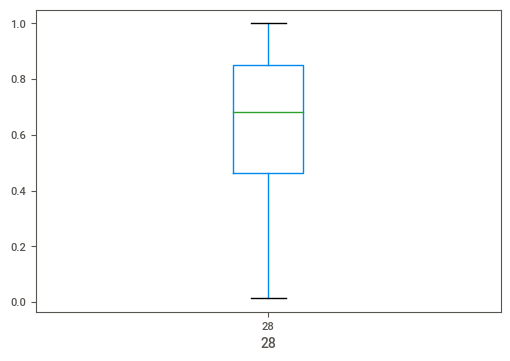

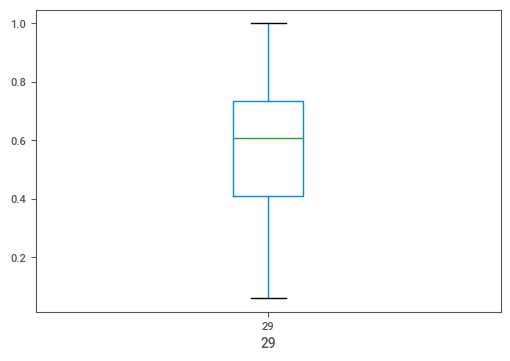

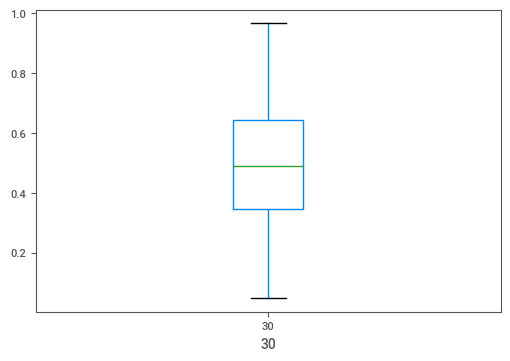

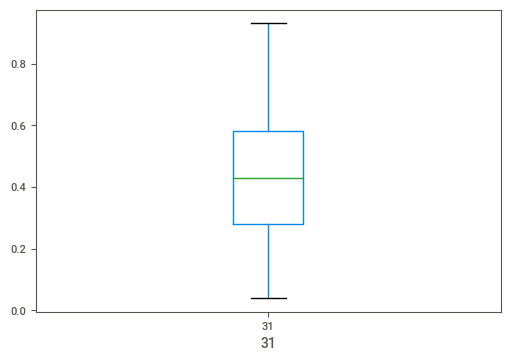

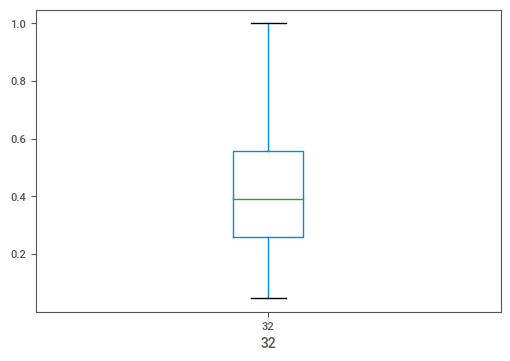

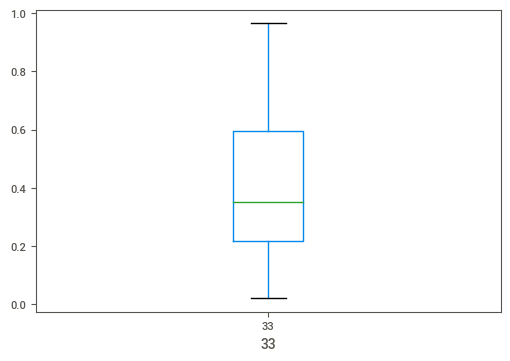

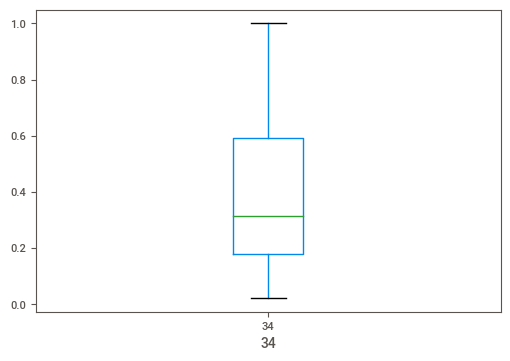

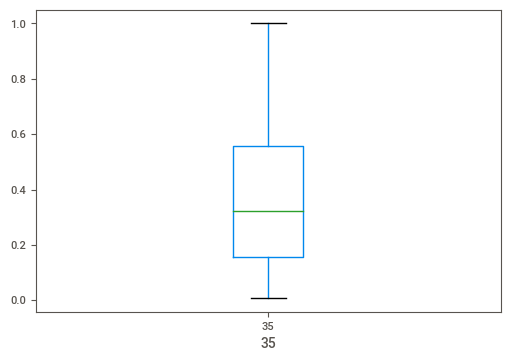

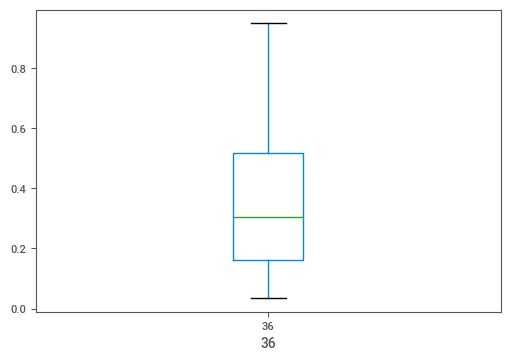

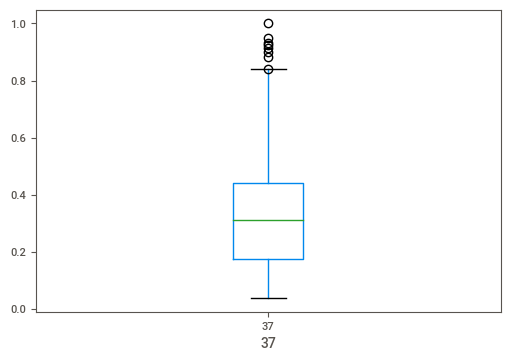

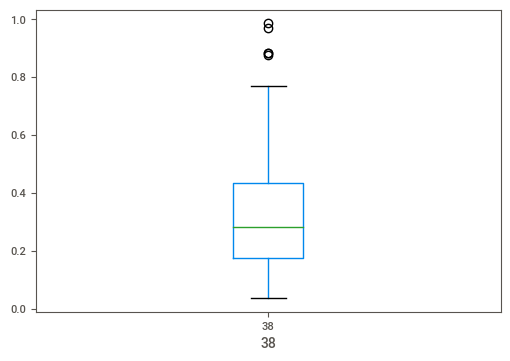

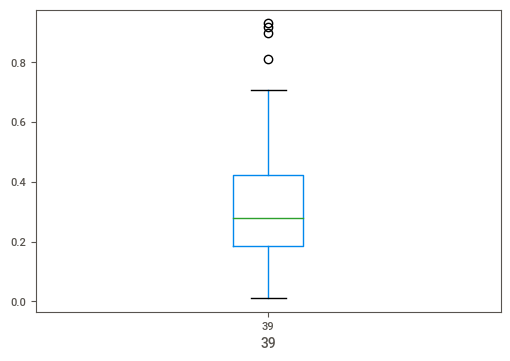

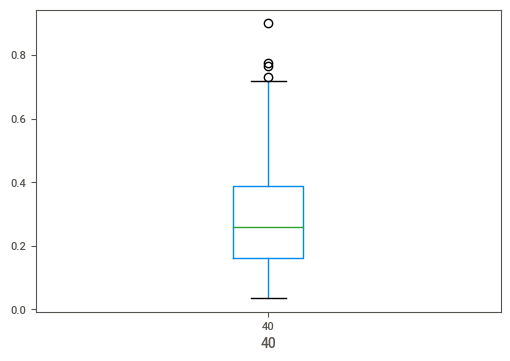

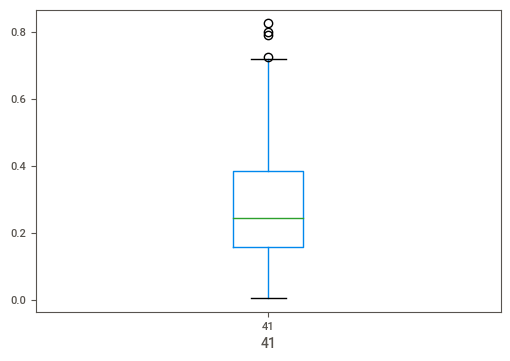

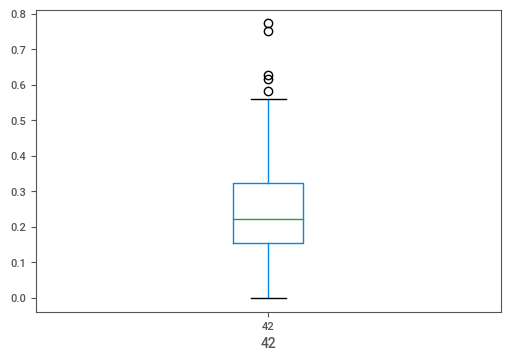

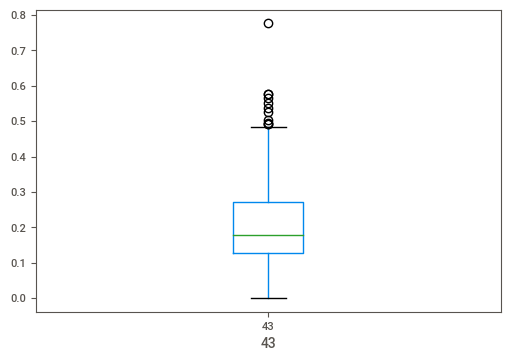

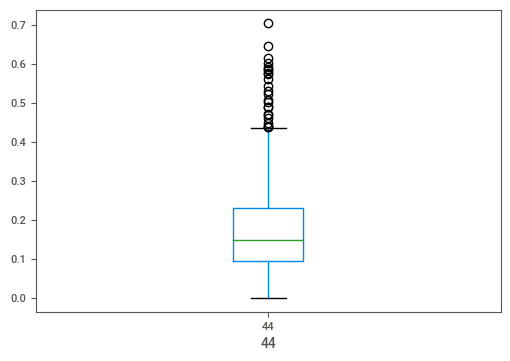

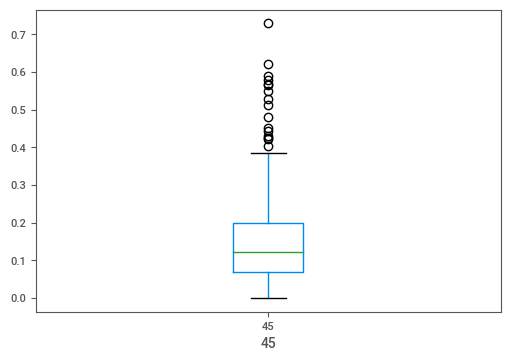

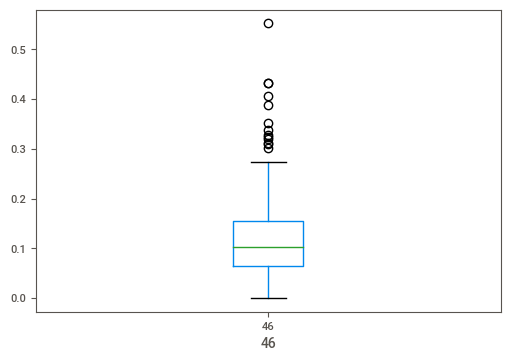

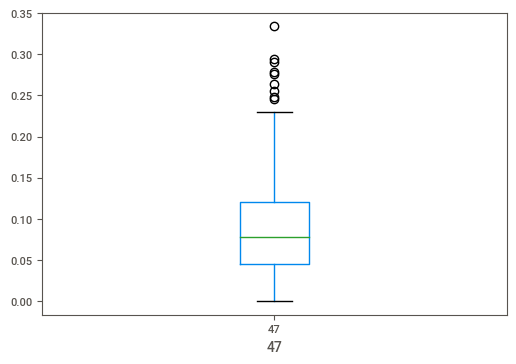

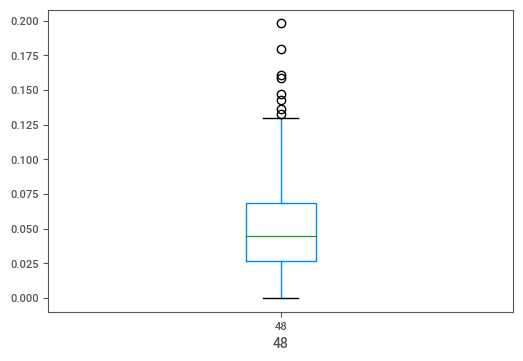

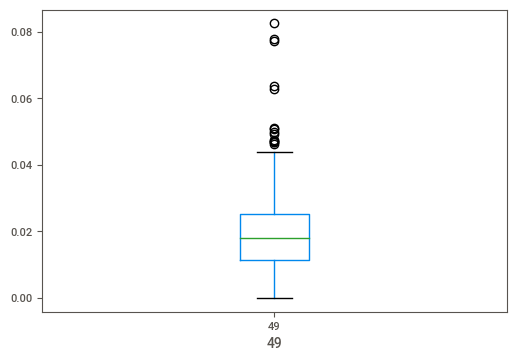

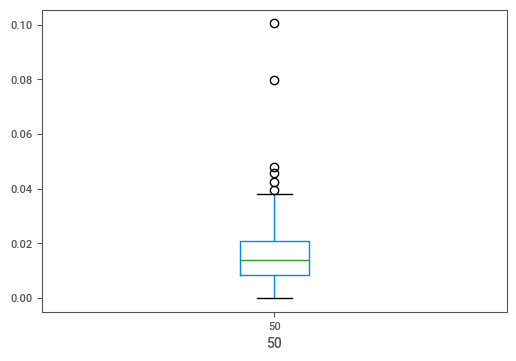

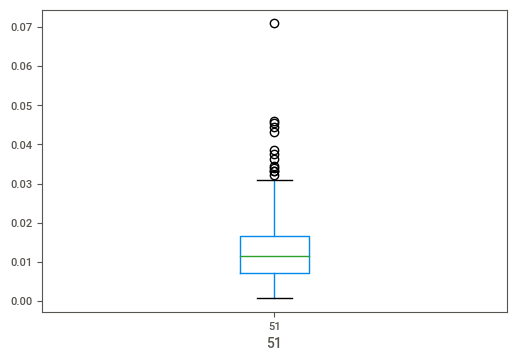

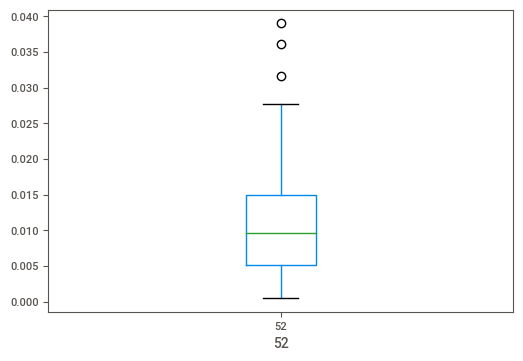

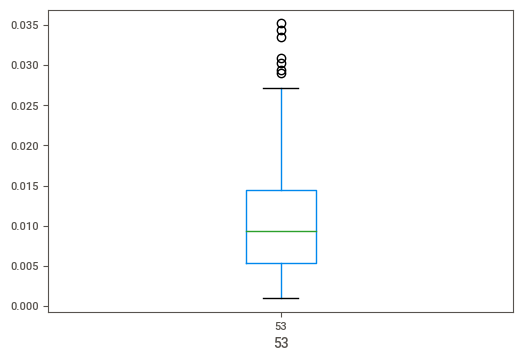

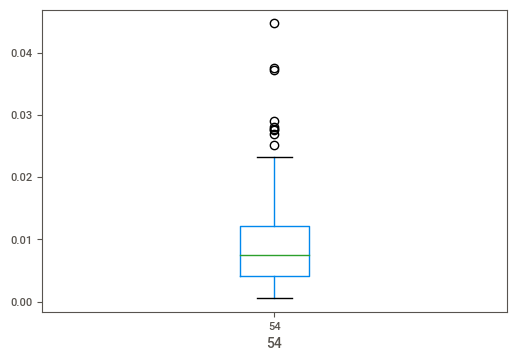

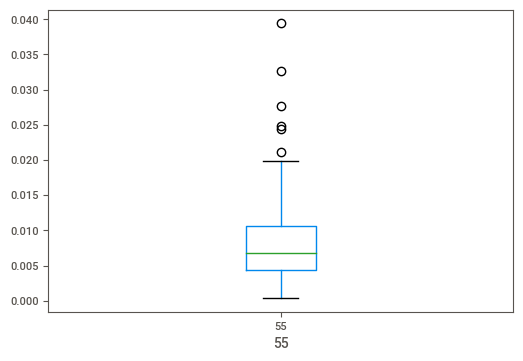

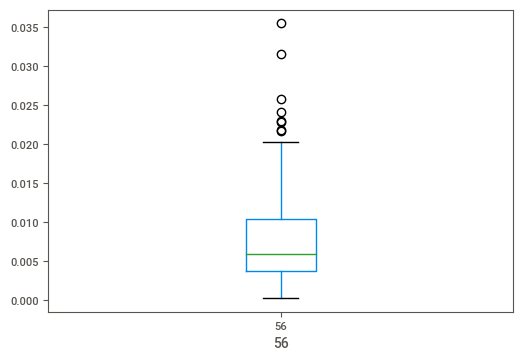

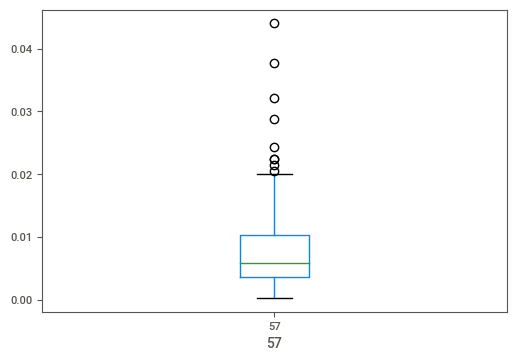

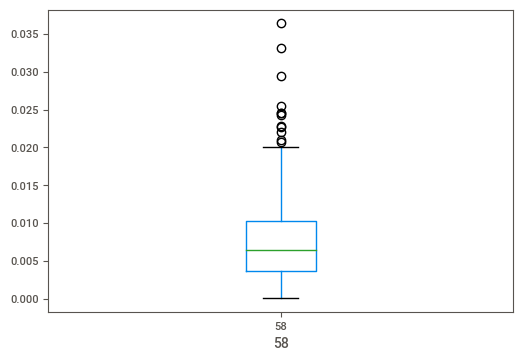

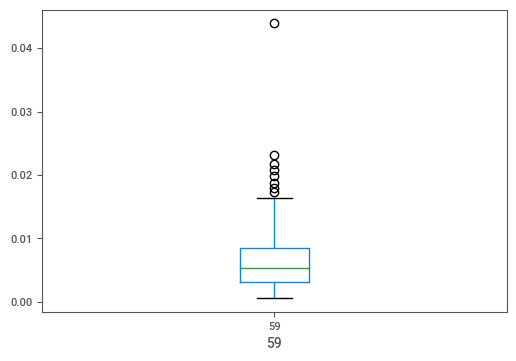

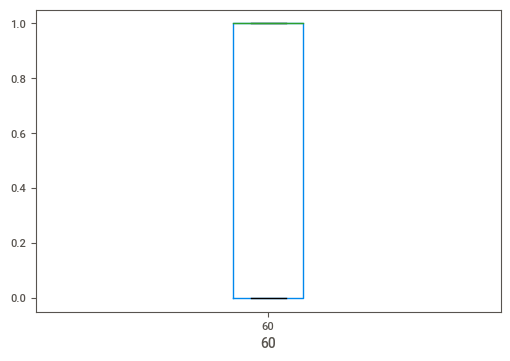

In [14]:
#checking for outliers

numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].plot.box()
    plt.xlabel(feature)
    plt.show()

<AxesSubplot:>

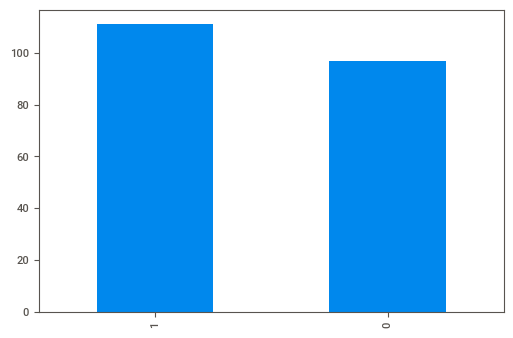

In [15]:
#checking if imbalanced dataset
df[60].value_counts().plot.bar() #balanced dataset

# Feature engineering

In [16]:
df[60].value_counts()

1    111
0     97
Name: 60, dtype: int64

In [19]:
df['target']=df[60]
df=df.drop([60],axis=1)
#df[60]=1*(df[60].values=='M')
#label encoder

In [20]:
df['target'].value_counts()

1    111
0     97
Name: target, dtype: int64

In [22]:
y=df['target']

In [24]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,1
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,1
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,0.9986,0.9699,1.0000,0.8630,0.6979,0.7717,0.7305,0.5197,0.1786,0.1098,0.1446,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757,0.1059,0.1005,0.0535,0.0235,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,1
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,0.2898,0.2812,0.1578,0.0273,0.0673,0.1444,0.2070,0.2645,0.2828,0.4293,0.5685,0.6990,0.7246,0.7622,0.92

# Dropping the target as we dont want to do PCA on it

In [25]:
df=df.drop(['target'],axis=1)

In [26]:
df.dtypes  #0ur target column[60] is object data type.
#we need to convert them into integer/float before applying the algorithms

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
14    float64
15    float64
16    float64
17    float64
18    float64
19    float64
20    float64
21    float64
22    float64
23    float64
24    float64
25    float64
26    float64
27    float64
28    float64
29    float64
30    float64
31    float64
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
46    float64
47    float64
48    float64
49    float64
50    float64
51    float64
52    float64
53    float64
54    float64
55    float64
56    float64
57    float64
58    float64
59    float64
dtype: object

# Feature selection using PCA

In [29]:
from sklearn.decomposition import PCA
pca=PCA(n_components=20)
x_pca=pca.fit_transform(df)
print(x_pca.shape)
x_pca20=pd.DataFrame(data=x_pca)
x_pca20

(208, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.576093,0.319393,-0.387291,-0.378009,-0.243780,-0.156243,-0.427736,0.074832,-0.024347,0.318054,0.115546,-0.191408,-0.235610,-0.176814,-0.229228,-0.045350,-0.096902,-0.009306,0.080012,0.078829
1,-0.970667,1.018039,0.834156,0.107423,0.286070,0.178684,-0.260332,0.385600,-0.004030,-0.072529,0.194461,-0.188529,-0.055020,-0.099839,0.130939,0.069038,0.053019,-0.064454,0.125968,-0.175314
2,-0.325887,0.874209,0.246015,0.863031,0.069110,-0.300833,-0.412807,0.075321,-0.010855,-0.438559,0.154054,-0.017024,-0.076625,0.292401,0.152490,0.016435,0.322687,0.156026,-0.093208,0.085140
3,0.852035,0.690863,-0.013390,-0.110257,-0.554050,0.397968,0.492569,-0.220460,0.537003,-0.436795,-0.336882,0.241950,0.074977,-0.108527,-0.132554,-0.004814,0.104740,-0.144403,-0.152558,-0.005592
4,-0.064756,0.222968,0.638601,0.140432,0.135854,0.052881,-0.386558,0.066549,-0.117006,-0.419277,0.145586,-0.394497,0.186196,0.022140,-0.120318,-0.220539,0.053734,0.158596,0.157744,0.059633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.041781,-1.031644,0.265669,0.021516,-0.015439,0.097304,0.003784,0.177926,-0.027908,-0.264179,-0.090828,-0.135192,-0.000412,0.090178,-0.172972,-0.031398,-0.049738,0.084614,0.009853,0.023706
204,0.219149,-1.153807,0.203619,0.045836,0.183272,0.012770,0.078507,0.264831,0.070749,-0.303296,-0.037156,-0.112662,-0.042971,-0.019030,0.018676,0.014344,-0.013986,0.055174,0.001749,-0.002012
205,0.297733,-1.151860,0.250096,-0.057702,0.163566,0.015275,0.045792,0.225904,0.072130,-0.313044,-0.185144,-0.112556,-0.048528,0.039887,-0.083181,-0.012678,0.010913,0.069247,-0.000974,-0.040735
206,-0.045761,-0.995970,0.199677,-0.066516,-0.147227,-0.084600,0.031038,0.067444,0.025771,-0.171120,-0.261023,-0.136402,-0.130465,0.186823,0.062728,0.094873,0.067944,0.046964,-0.060064,0.063445


# Concating the target feature with the dataframe we got by PCA

In [30]:
df=pd.concat([x_pca20,y],axis=1)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,target
0,0.576093,0.319393,-0.387291,-0.378009,-0.243780,-0.156243,-0.427736,0.074832,-0.024347,0.318054,0.115546,-0.191408,-0.235610,-0.176814,-0.229228,-0.045350,-0.096902,-0.009306,0.080012,0.078829,0
1,-0.970667,1.018039,0.834156,0.107423,0.286070,0.178684,-0.260332,0.385600,-0.004030,-0.072529,0.194461,-0.188529,-0.055020,-0.099839,0.130939,0.069038,0.053019,-0.064454,0.125968,-0.175314,0
2,-0.325887,0.874209,0.246015,0.863031,0.069110,-0.300833,-0.412807,0.075321,-0.010855,-0.438559,0.154054,-0.017024,-0.076625,0.292401,0.152490,0.016435,0.322687,0.156026,-0.093208,0.085140,0
3,0.852035,0.690863,-0.013390,-0.110257,-0.554050,0.397968,0.492569,-0.220460,0.537003,-0.436795,-0.336882,0.241950,0.074977,-0.108527,-0.132554,-0.004814,0.104740,-0.144403,-0.152558,-0.005592,0
4,-0.064756,0.222968,0.638601,0.140432,0.135854,0.052881,-0.386558,0.066549,-0.117006,-0.419277,0.145586,-0.394497,0.186196,0.022140,-0.120318,-0.220539,0.053734,0.158596,0.157744,0.059633,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.041781,-1.031644,0.265669,0.021516,-0.015439,0.097304,0.003784,0.177926,-0.027908,-0.264179,-0.090828,-0.135192,-0.000412,0.090178,-0.172972,-0.031398,-0.049738,0.084614,0.009853,0.023706,1
204,0.219149,-1.153807,0.203619,0.045836,0.183272,0.012770,0.078507,0.264831,0.070749,-0.303296,-0.037156,-0.112662,-0.042971,-0.019030,0.018676,0.014344,-0.013986,0.055174,0.001749,-0.002012,1
205,0.297733,-1.151860,0.250096,-0.057702,0.163566,0.015275,0.045792,0.225904,0.072130,-0.313044,-0.185144,-0.112556,-0.048528,0.039887,-0.083181,-0.012678,0.010913,0.069247,-0.000974,-0.040735,1
206,-0.045761,-0.995970,0.199677,-0.066516,-0.147227,-0.084600,0.031038,0.067444,0.025771,-0.171120,-0.261023,-0.136402,-0.130465,0.186823,0.062728,0.094873,0.067944,0.046964,-0.060064,0.063445,1


# Feature Engineering-part 2

In [31]:
#data is skewed
#so we will use two step method to remove skewness as much as possible.
#1-->log transformations
#2-->StandarScaler

In [32]:
#Removing skewness in the dataset by applying log transformations

df.skew() #we can see the data is +vely(right)skewed,hence we apply log transformation and then scale the data. 

0         0.177056
1         0.403361
2         0.179856
3         0.437246
4        -0.081498
5         0.260802
6         0.407128
7         0.058413
8        -0.223131
9        -0.266651
10       -0.394828
11        0.505002
12        0.467195
13        0.016307
14        0.174178
15       -0.112537
16        0.633972
17        0.412351
18       -0.040582
19       -0.008635
target   -0.135903
dtype: float64

# Removing outliers by zscore method

In [33]:
#Removing outliers first then skewness
from scipy.stats import zscore
z=abs(zscore(df))
z.shape

(208, 21)

In [34]:
df=df[(z<3).all(axis=1)]
df.shape

(188, 21)

# Removing skewness by taking log transformation method

In [35]:
#Removing skewness after removing outliers
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])
    

In [36]:
df.skew()#we can see our features skewness has come down within range

0         0.175660
1         0.496099
2         0.199119
3         0.436795
4        -0.074977
5         0.297589
6         0.260944
7         0.026674
8        -0.213714
9        -0.462577
10       -0.450000
11       -0.031223
12        0.213299
13        0.093535
14       -0.017439
15       -0.141802
16        0.498381
17       -0.243083
18       -0.423971
19        0.015425
target   -0.237561
dtype: float64

In [37]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,target
0,0.576093,0.319393,-0.387291,-0.378009,-0.243780,-0.156243,-0.427736,0.074832,-0.024347,0.318054,0.115546,-0.191408,-0.235610,-0.176814,-0.229228,-0.045350,-0.096902,-0.009306,0.080012,0.078829,0
1,-0.970667,1.018039,0.834156,0.107423,0.286070,0.178684,-0.260332,0.385600,-0.004030,-0.072529,0.194461,-0.188529,-0.055020,-0.099839,0.130939,0.069038,0.053019,-0.064454,0.125968,-0.175314,0
2,-0.325887,0.874209,0.246015,0.863031,0.069110,-0.300833,-0.412807,0.075321,-0.010855,-0.438559,0.154054,-0.017024,-0.076625,0.292401,0.152490,0.016435,0.322687,0.156026,-0.093208,0.085140,0
3,0.852035,0.690863,-0.013390,-0.110257,-0.554050,0.397968,0.492569,-0.220460,0.537003,-0.436795,-0.336882,0.241950,0.074977,-0.108527,-0.132554,-0.004814,0.104740,-0.144403,-0.152558,-0.005592,0
4,-0.064756,0.222968,0.638601,0.140432,0.135854,0.052881,-0.386558,0.066549,-0.117006,-0.419277,0.145586,-0.394497,0.186196,0.022140,-0.120318,-0.220539,0.053734,0.158596,0.157744,0.059633,0


# Scaling the Data

In [38]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(df)
x=pd.DataFrame(data=X_scaled,columns=df.columns)


In [39]:
x.skew()

0         0.175660
1         0.496099
2         0.199119
3         0.436795
4        -0.074977
5         0.297589
6         0.260944
7         0.026674
8        -0.213714
9        -0.462577
10       -0.450000
11       -0.031223
12        0.213299
13        0.093535
14       -0.017439
15       -0.141802
16        0.498381
17       -0.243083
18       -0.423971
19        0.015425
target   -0.237561
dtype: float64

# Model Building

In [40]:
y=df[['target']]
x=df.drop(['target'],axis=1)

In [41]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [43]:
knn=KNeighborsClassifier()
svc=SVC()
lr=LogisticRegression()
dt=DecisionTreeClassifier()
gnb=GaussianNB()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()

In [44]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dt))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))
models.append(('XGBClassifier',xgb))
models.append(('GradientBoostingClassifier',gbc))
models.append(('AdaBoostClassifier',ada))

In [45]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score

***************** KNeighborsClassifier *******************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score  - 0.8085106382978723


cross_val_score  - 0.5980701754385965


roc_auc_score  - 0.7994505494505495


Recall_score  - 0.8846153846153846


classification report
               precision    recall  f1-score   support

           0       0.83      0.71      0.77        21
           1       0.79      0.88      0.84        26

    accuracy                           0.81        47
   macro avg       0.81      0.80      0.80        47
weighted avg       0.81      0.81      0.81        47



[[15  6]
 [ 3 23]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



***************** SVC *******************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    ke

cross_val_score  - 0.6332456140350877


roc_auc_score  - 0.8186813186813187


Recall_score  - 0.9230769230769231


classification report
               precision    recall  f1-score   support

           0       0.88      0.71      0.79        21
           1       0.80      0.92      0.86        26

    accuracy                           0.83        47
   macro avg       0.84      0.82      0.82        47
weighted avg       0.84      0.83      0.83        47



[[15  6]
 [ 2 24]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)





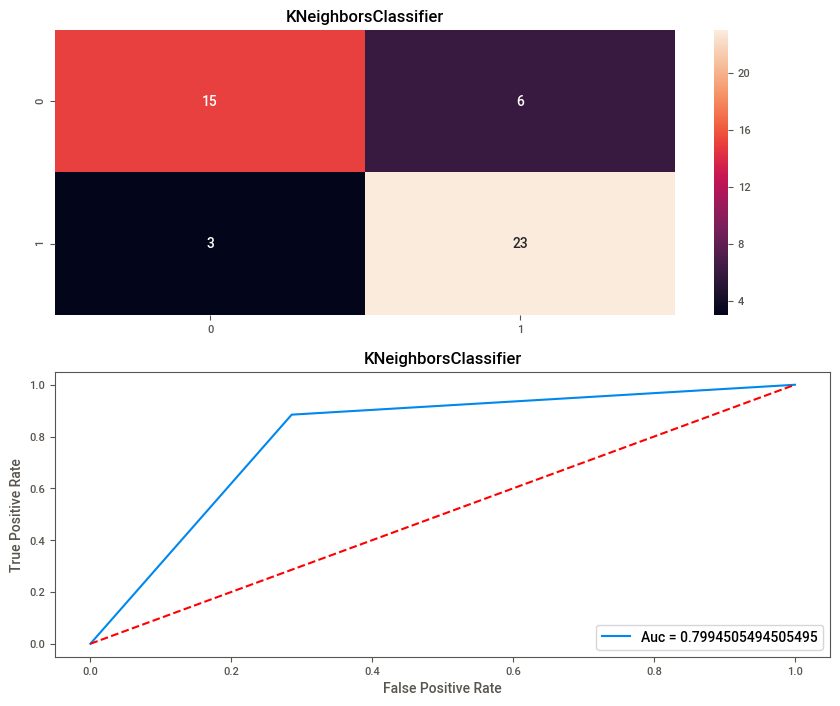

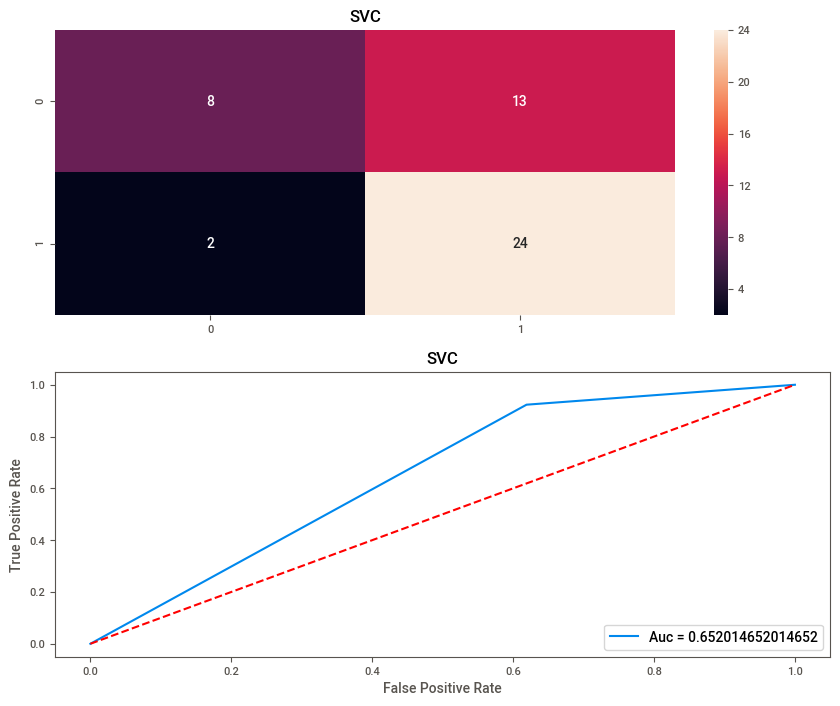

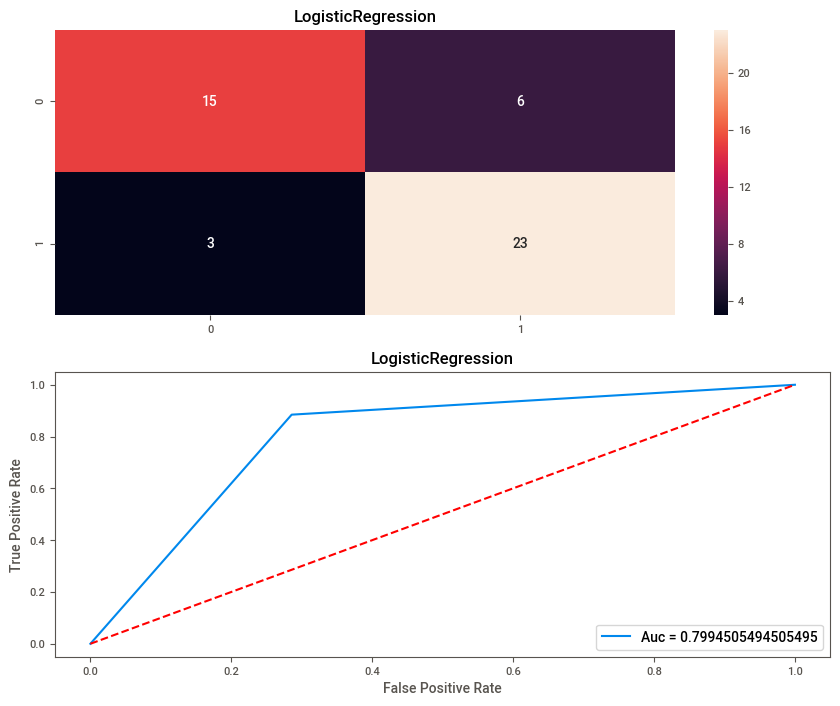

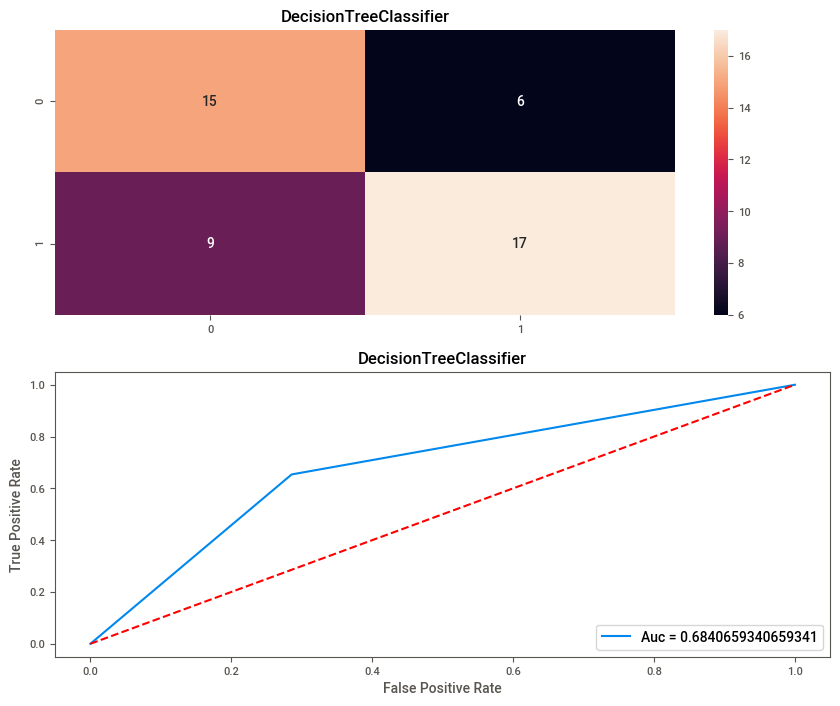

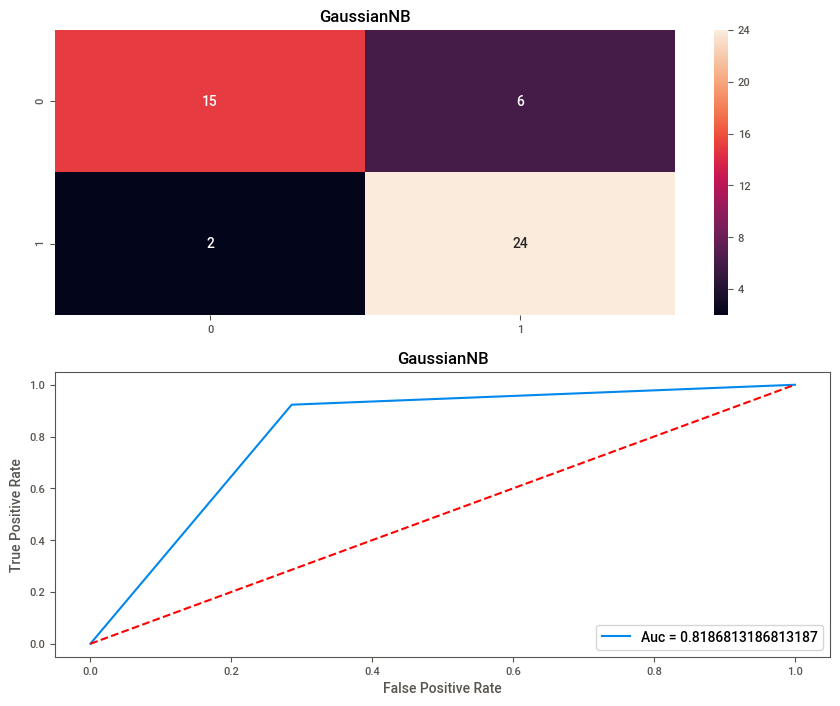

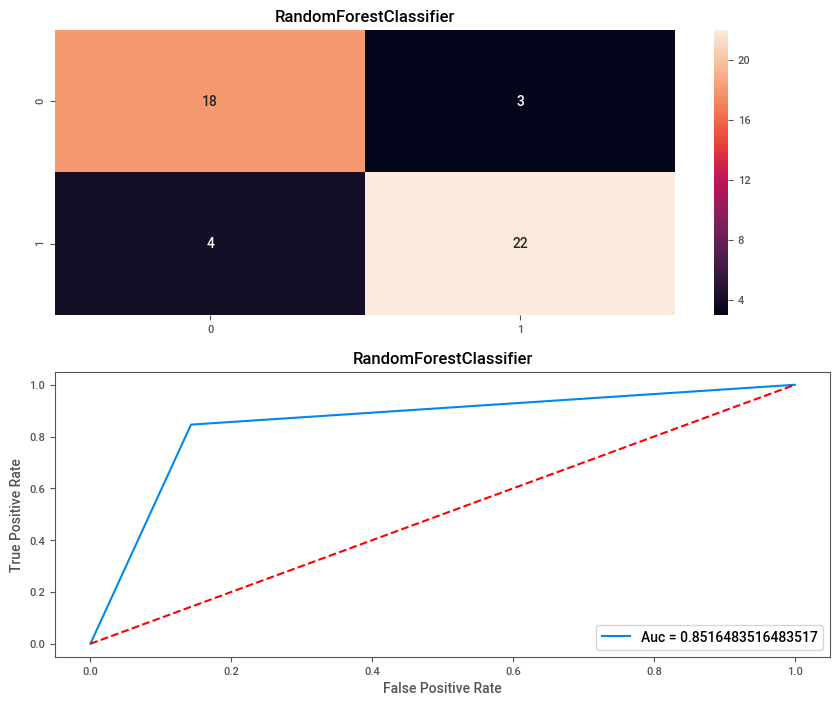

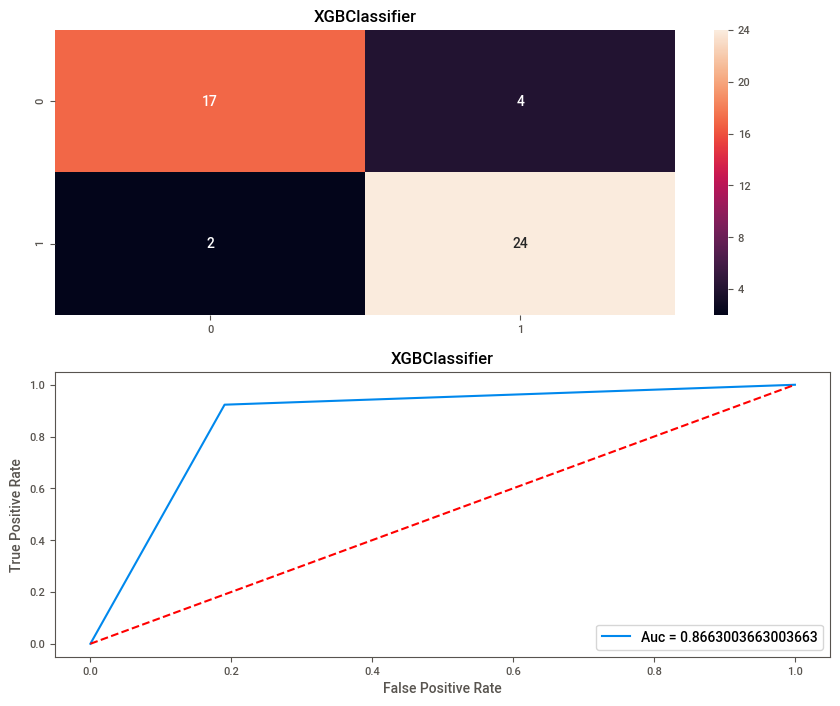

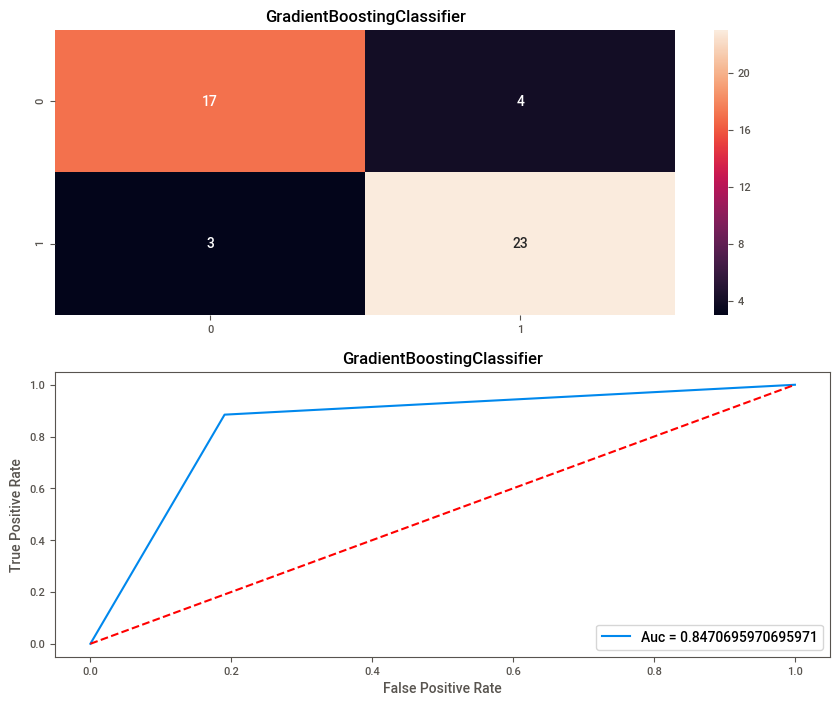

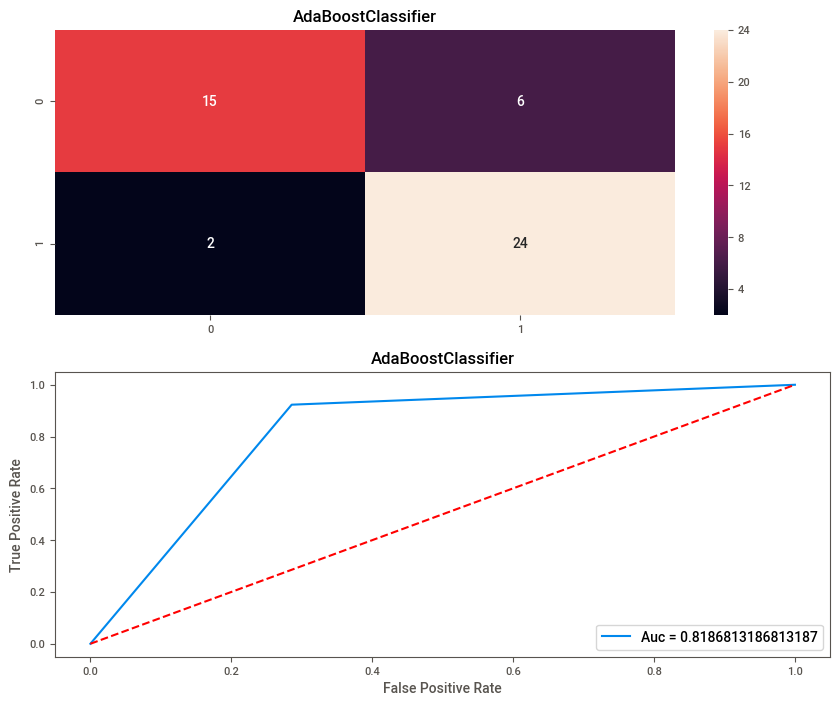

In [46]:
Model=[]
score=[]
cv=[]
rocscore=[]
recall=[]
for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score  -',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
    
    fpr,tpr,threshold=roc_curve(y_test,pre)
    roc_auc=auc(fpr,tpr)
    print('roc_auc_score  -',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    
    re=recall_score(y_test,pre)
    print('Recall_score  -',re)
    recall.append(re*100)
    print('\n')
    
    print('classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr,tpr,label='Auc = ' +str(roc_auc))
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')
    
    
    

In [47]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Recall_score':recall,'Cross_val_score':cv,'auc_score':rocscore})
result

,Model,Accuracy_score,Recall_score,Cross_val_score,auc_score
0,KNeighborsClassifier,80.851064,88.461538,59.807018,79.945055
1,SVC,68.085106,92.307692,63.096491,65.201465
2,LogisticRegression,80.851064,88.461538,63.991228,79.945055
3,DecisionTreeClassifier,68.085106,65.384615,55.558480,68.406593
4,GaussianNB,82.978723,92.307692,56.672515,81.868132
5,RandomForestClassifier,85.106383,84.615385,62.774854,85.164835
6,XGBClassifier,87.234043,92.307692,62.804094,86.630037
7,GradientBoostingClassifier,85.106383,88.461538,67.108187,84.706960
8,AdaBoostClassifier,82.978723,92.307692,63.324561,81.868132


In [48]:
#We can see GradientBoostingClassifier's Cross_val_score, recall_score & auc is the best,so its the  best performing Algorithm .

In [49]:
#We can see from the table GradientBoostingClassifier is the best performing Algorithm.
#But the difference in accuracy and CVS scores is very high.
#The model is suffering from under/overfitting condition.

In [50]:
#Hence we will apply Gridsearchcv to the top3 performing  model and try to increase the cv score.

In [51]:
#Now lets calculate the random state of the models at which they perform the best.

# Finding the best random_state 

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,recall_score
from sklearn.linear_model import LogisticRegression
def maxrecall_score(model,x,y):
    max_recall=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,stratify=y)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=recall_score(y_test,pred)
        roc_score=roc_auc_score(y_test,pred)
        if score>max_recall:
            max_recall=score
            final_r_state=r_state
    print('max_recall_score is at random_state  ',final_r_state,'  which is  ',max_recall,'and roc_auc_score=',roc_score)
    return final_r_state

In [53]:
print('knn',maxrecall_score(knn,x,y))
print('svc',maxrecall_score(svc,x,y))
print('lr',maxrecall_score(lr,x,y))
print('dt',maxrecall_score(dt,x,y))
print('gnb',maxrecall_score(gnb,x,y))
print('rfc',maxrecall_score(rfc,x,y))
print('xgb',maxrecall_score(xgb,x,y))
print('gbc',maxrecall_score(gbc,x,y))
print('ada',maxrecall_score(ada,x,y))

max_recall_score is at random_state   47   which is   1.0 and roc_auc_score= 0.7802197802197803
knn 47
max_recall_score is at random_state   52   which is   1.0 and roc_auc_score= 0.684981684981685
svc 52
max_recall_score is at random_state   79   which is   1.0 and roc_auc_score= 0.7032967032967032
lr 79
max_recall_score is at random_state   59   which is   0.9615384615384616 and roc_auc_score= 0.5842490842490842
dt 59
max_recall_score is at random_state   46   which is   0.9615384615384616 and roc_auc_score= 0.6410256410256411
gnb 46
max_recall_score is at random_state   42   which is   0.9230769230769231 and roc_auc_score= 0.5357142857142857
rfc 42
max_recall_score is at random_state   46   which is   1.0 and roc_auc_score= 0.7893772893772893
xgb 46
max_recall_score is at random_state   59   which is   0.9615384615384616 and roc_auc_score= 0.6895604395604396
gbc 59
max_recall_score is at random_state   42   which is   0.9230769230769231 and roc_auc_score= 0.6364468864468864
ada 42


In [55]:
#Lets try gridsearchcv and see if we can get a better score than this.
#otherwise we will save this model as final model.

# GridsearchCV 

# model1->GradientBoostingClassifier(random_state=59)=96.15%

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=59,stratify=y)
gbc=GradientBoostingClassifier()

In [67]:
from sklearn.model_selection import GridSearchCV
parameters=[{'max_depth':[5,7,9,10],'learning_rate':[1,0.1,0.001],'n_estimators':[100,250,500]}]
            
gscv=GridSearchCV(gbc,parameters,scoring='recall',n_jobs=-1,cv=10)
grid_search=gscv.fit(x,y)
grid_search.best_params_

{'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 100}

In [68]:
#applying the best parameters form GridsearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=46,stratify=y)
xgb=XGBClassifier(n_estimators=100,learning_rate=0.001,max_depth=5)
xgb.fit(x,y)
pred=xgb.predict(x_test)
print('recall_score=  ',recall_score(y_test,pred))
print('roc_score='     ,roc_auc_score(y_test,pred))

recall_score=   0.9615384615384616
roc_score= 0.9331501831501832


In [69]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
xgb=XGBClassifier(n_estimators=100,learning_rate=0.001,max_depth=5)
cvs=cross_val_score(xgb,x,y,scoring='recall',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(xgb,x,y,cv=10)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.6218181818181818


array([[41, 40],
       [42, 65]], dtype=int64)

# model2->LogisticRegression(random_state=74)=100%

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=74,stratify=y)
lr=LogisticRegression()

In [61]:
from sklearn.model_selection import GridSearchCV
parameters={'penalty':['l1','l2'],'C':[1,2,3,4,5]}
gscv=GridSearchCV(lr,param_grid=parameters,cv=3,scoring='recall')
gscv.fit(x,y)
gscv.best_params_

{'C': 5, 'penalty': 'l1'}

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=49)
lr=LogisticRegression(C=5, penalty='l1')
lr.fit(x,y)
pred=lr.predict(x_test)
print('recall_score=  ',recall_score(y_test,pred))
print('roc_score='     ,roc_auc_score(y_test,pred))

recall_score=   0.875
roc_score= 0.7853260869565217


In [65]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
lr=LogisticRegression(C=2, penalty='l1')
cvs=cross_val_score(lr,x,y,scoring='recall',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(lr,x,y,cv=3)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.6663636363636364


array([[49, 45],
       [34, 60]], dtype=int64)

# model3->XGBClassifier(random_state=70)=100%

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=70,stratify=y)
xgb=XGBClassifier()

In [71]:
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4],'max_depth':[3,4,5,6,7,8],'colsample_bytree':[0.5,0.6,0.7,0.8,0.9]}]
            
gscv=GridSearchCV(xgb,parameters,scoring='recall',n_jobs=-1,cv=10)
grid_search=gscv.fit(x,y)
grid_search.best_params_

{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7}

In [75]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=70)
xgb=XGBClassifier(colsample_bytree=0.7, learning_rate=0.1, max_depth=7)
xgb.fit(x,y)
pred=xgb.predict(x_test)
print('recall_score=  ',recall_score(y_test,pred))
print('roc_score='     ,roc_auc_score(y_test,pred))

recall_score=   1.0
roc_score= 1.0


In [76]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
xgb=XGBClassifier(colsample_bytree=0.7, learning_rate=0.1, max_depth=7)
cvs=cross_val_score(xgb,x,y,scoring='recall',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(xgb,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.740909090909091


array([[48, 50],
       [35, 55]], dtype=int64)

# saving the XGBClassifier model

In [77]:
#From all the model tried above XGBClassifier model cross_val_score is best=74.09%,
#corresponding random_state=70
#Hence saving the final model as XGBClassifier.
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=70)
xgb=XGBClassifier(colsample_bytree=0.7, learning_rate=0.1, max_depth=7)
xgb.fit(x,y)
pred=xgb.predict(x_test)
print('recall_score=  ',recall_score(y_test,pred))
print('roc_score='     ,roc_auc_score(y_test,pred))

recall_score=   1.0
roc_score= 1.0


In [83]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
xgb=XGBClassifier(colsample_bytree=0.7, learning_rate=0.1, max_depth=7)
xgb.fit(x,y)
cvs=cross_val_score(xgb,x,y,scoring='recall',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(xgb,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.740909090909091


array([[48, 50],
       [35, 55]], dtype=int64)

In [84]:
from sklearn.externals import joblib
joblib.dump(xgb,'project1.obj')

['project1.obj']

In [85]:
model=joblib.load('project1.obj')

In [86]:
Final_predictions=model.predict(x_test)
Final_predictions=pd.DataFrame(Final_predictions,columns=['mines(1) or rock(0)'])
Final_predictions[:5]

,mines(1) or rock(0)
0,0
1,1
2,0
3,1
4,1


In [88]:
Final_predictions.sample(n=10)

,mines(1) or rock(0)
5,1
13,1
15,0
1,1
22,1
17,1
10,0
33,1
19,1
46,0


# Saving final predictions in file.csv format

In [87]:
Final_predictions.to_csv('E:\\final_predictionssonar.csv',index=False)

# Conclusion:-